In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, ReLU
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")
    
np.random.seed(3)
tf.random.set_seed(3)

In [11]:
depth = 64 + 64 + 64 + 64
g_model = Sequential()
g_model.add(Dense(depth*7*7, input_dim=100, activation='relu'))
g_model.add(BatchNormalization(momentum=0.9))
g_model.add(Reshape((7,7,128)))
g_model.add(Dropout(0.4))
g_model.add(UpSampling2D())

g_model.add(Conv2D(int(depth/2), kernel_size=5, padding='same', activation='relu'))
g_model.add(BatchNormalization(momentum=0.9))
g_model.add(UpSampling2D())

g_model.add(Conv2D(int(depth/4), kernel_size=5, padding='same',activation='relu'))
g_model.add(BatchNormalization(momentum=0.9))

g_model.add(Conv2D(int(depth/8), kernel_size=5, padding='same',activation='relu'))
g_model.add(BatchNormalization(momentum=0.9))

g_model.add(Conv2D(1, kernel_size=5, padding='same', activation='sigmoid'))
g_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_4 (Batch (None, 12544)             50176     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 128)      

In [4]:
d_model = Sequential()
d_model.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
d_model.add(Activation(LeakyReLU(0.2)))
d_model.add(Dropout(0.3))
d_model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
d_model.add(Activation(LeakyReLU(0.2)))
d_model.add(Dropout(0.3))
d_model.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
d_model.add(Activation(LeakyReLU(0.2)))
d_model.add(Dropout(0.3))
d_model.add(Flatten())
d_model.add(Dense(1, activation='sigmoid'))
d_model.compile(loss='binary_crossentropy', optimizer='adam')
d_model.trainable = False
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)        

In [5]:
g_input = Input(shape=(100,))
dis_output = d_model(g_model(g_input))
gan = Model(g_input, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         928321    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1030145   
Total params: 1,958,466
Trainable params: 915,553
Non-trainable params: 1,042,913
_________________________________________________________________


In [6]:
epoch= 1001
batch_size = 32
saving_interval = 100
history= []

(X_train, _), (_,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255.0
true = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

epoch:0  d_Loss:0.8426  g_loss:0.7129
epoch:1  d_Loss:0.6111  g_loss:0.8525
epoch:2  d_Loss:0.5472  g_loss:0.9991
epoch:3  d_Loss:0.4047  g_loss:1.1378
epoch:4  d_Loss:0.2074  g_loss:1.1599
epoch:5  d_Loss:0.0640  g_loss:0.6784
epoch:6  d_Loss:0.0096  g_loss:0.4350
epoch:7  d_Loss:0.0014  g_loss:0.3517
epoch:8  d_Loss:0.0002  g_loss:0.1868
epoch:9  d_Loss:0.0000  g_loss:0.0224
epoch:10  d_Loss:0.0000  g_loss:0.4148
epoch:11  d_Loss:0.0000  g_loss:0.4174
epoch:12  d_Loss:0.0000  g_loss:0.1249
epoch:13  d_Loss:0.0000  g_loss:0.3556
epoch:14  d_Loss:0.0000  g_loss:0.8975
epoch:15  d_Loss:0.0000  g_loss:0.2289
epoch:16  d_Loss:0.0000  g_loss:0.4733
epoch:17  d_Loss:0.0000  g_loss:0.7580
epoch:18  d_Loss:0.0000  g_loss:0.1536
epoch:19  d_Loss:0.0000  g_loss:0.0010
epoch:20  d_Loss:0.0000  g_loss:0.0145
epoch:21  d_Loss:0.0000  g_loss:0.8365
epoch:22  d_Loss:0.0000  g_loss:0.7137
epoch:23  d_Loss:0.0000  g_loss:1.5082
epoch:24  d_Loss:0.0000  g_loss:0.7846
epoch:25  d_Loss:0.0000  g_loss:0.0

epoch:210  d_Loss:0.0098  g_loss:0.0001
epoch:211  d_Loss:0.0065  g_loss:0.0000
epoch:212  d_Loss:0.0451  g_loss:0.0001
epoch:213  d_Loss:0.0673  g_loss:0.0000
epoch:214  d_Loss:0.0067  g_loss:0.0001
epoch:215  d_Loss:0.0020  g_loss:0.0002
epoch:216  d_Loss:0.0181  g_loss:0.0029
epoch:217  d_Loss:0.0056  g_loss:0.1363
epoch:218  d_Loss:0.0107  g_loss:0.0073
epoch:219  d_Loss:0.0489  g_loss:0.0025
epoch:220  d_Loss:0.0285  g_loss:0.0001
epoch:221  d_Loss:0.0023  g_loss:0.0005
epoch:222  d_Loss:0.0160  g_loss:0.0021
epoch:223  d_Loss:0.0116  g_loss:0.0002
epoch:224  d_Loss:0.0391  g_loss:0.0018
epoch:225  d_Loss:0.0449  g_loss:0.0024
epoch:226  d_Loss:0.0050  g_loss:0.0034
epoch:227  d_Loss:0.0167  g_loss:0.0258
epoch:228  d_Loss:0.0141  g_loss:0.0010
epoch:229  d_Loss:0.0611  g_loss:0.0002
epoch:230  d_Loss:0.0204  g_loss:0.0018
epoch:231  d_Loss:0.1970  g_loss:0.0000
epoch:232  d_Loss:0.0072  g_loss:0.0002
epoch:233  d_Loss:0.0160  g_loss:0.0032
epoch:234  d_Loss:0.0529  g_loss:0.0075


epoch:416  d_Loss:0.1108  g_loss:1.6173
epoch:417  d_Loss:0.1703  g_loss:2.5332
epoch:418  d_Loss:0.0836  g_loss:3.2312
epoch:419  d_Loss:0.1606  g_loss:3.2099
epoch:420  d_Loss:0.1578  g_loss:2.5906
epoch:421  d_Loss:0.2175  g_loss:2.0038
epoch:422  d_Loss:0.1349  g_loss:1.6732
epoch:423  d_Loss:0.1526  g_loss:1.4805
epoch:424  d_Loss:0.2064  g_loss:2.2375
epoch:425  d_Loss:0.2277  g_loss:2.7595
epoch:426  d_Loss:0.2938  g_loss:1.4748
epoch:427  d_Loss:0.2365  g_loss:1.3942
epoch:428  d_Loss:0.5924  g_loss:1.2177
epoch:429  d_Loss:0.1110  g_loss:2.4417
epoch:430  d_Loss:0.2297  g_loss:2.6860
epoch:431  d_Loss:0.2933  g_loss:2.2939
epoch:432  d_Loss:0.3677  g_loss:1.4915
epoch:433  d_Loss:0.4125  g_loss:1.7951
epoch:434  d_Loss:0.2027  g_loss:2.4906
epoch:435  d_Loss:0.1847  g_loss:3.2271
epoch:436  d_Loss:0.4917  g_loss:1.9446
epoch:437  d_Loss:0.3968  g_loss:1.6110
epoch:438  d_Loss:0.4141  g_loss:2.4305
epoch:439  d_Loss:0.2626  g_loss:3.7011
epoch:440  d_Loss:0.4381  g_loss:3.2488


epoch:622  d_Loss:0.3673  g_loss:2.3503
epoch:623  d_Loss:0.5504  g_loss:1.6502
epoch:624  d_Loss:0.4886  g_loss:1.8555
epoch:625  d_Loss:0.5156  g_loss:1.9846
epoch:626  d_Loss:0.4850  g_loss:2.0240
epoch:627  d_Loss:0.6213  g_loss:1.8481
epoch:628  d_Loss:0.8645  g_loss:1.6111
epoch:629  d_Loss:0.4967  g_loss:1.6612
epoch:630  d_Loss:0.3857  g_loss:2.0501
epoch:631  d_Loss:0.5955  g_loss:1.6394
epoch:632  d_Loss:0.5201  g_loss:2.1776
epoch:633  d_Loss:0.3457  g_loss:2.0561
epoch:634  d_Loss:0.4232  g_loss:1.9523
epoch:635  d_Loss:0.3074  g_loss:2.7544
epoch:636  d_Loss:0.2366  g_loss:2.7781
epoch:637  d_Loss:0.3173  g_loss:2.7627
epoch:638  d_Loss:0.3041  g_loss:2.9937
epoch:639  d_Loss:0.2724  g_loss:2.9816
epoch:640  d_Loss:0.2969  g_loss:3.1641
epoch:641  d_Loss:0.4536  g_loss:2.7292
epoch:642  d_Loss:0.2482  g_loss:2.8256
epoch:643  d_Loss:0.2989  g_loss:2.8606
epoch:644  d_Loss:0.2462  g_loss:2.6883
epoch:645  d_Loss:0.5016  g_loss:2.8572
epoch:646  d_Loss:0.3902  g_loss:3.0584


epoch:828  d_Loss:0.2941  g_loss:2.0484
epoch:829  d_Loss:0.2937  g_loss:2.3249
epoch:830  d_Loss:0.4136  g_loss:2.2430
epoch:831  d_Loss:0.3226  g_loss:2.1751
epoch:832  d_Loss:0.3175  g_loss:2.0955
epoch:833  d_Loss:0.3151  g_loss:2.5684
epoch:834  d_Loss:0.3208  g_loss:3.1509
epoch:835  d_Loss:0.4892  g_loss:2.1056
epoch:836  d_Loss:0.4355  g_loss:2.6961
epoch:837  d_Loss:0.3287  g_loss:1.8540
epoch:838  d_Loss:0.5848  g_loss:2.2828
epoch:839  d_Loss:0.3960  g_loss:2.2582
epoch:840  d_Loss:0.4923  g_loss:2.4052
epoch:841  d_Loss:0.3989  g_loss:2.3228
epoch:842  d_Loss:0.4929  g_loss:2.0960
epoch:843  d_Loss:0.5660  g_loss:1.5730
epoch:844  d_Loss:0.5894  g_loss:1.9580
epoch:845  d_Loss:0.6014  g_loss:2.2719
epoch:846  d_Loss:0.5949  g_loss:2.2495
epoch:847  d_Loss:0.7032  g_loss:1.7094
epoch:848  d_Loss:0.7183  g_loss:1.4009
epoch:849  d_Loss:0.7906  g_loss:1.5281
epoch:850  d_Loss:0.5025  g_loss:2.0474
epoch:851  d_Loss:0.6930  g_loss:1.9596
epoch:852  d_Loss:0.5966  g_loss:1.8660


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1001  d_Loss:0.4518  g_loss:1.6927
epoch:1002  d_Loss:0.5171  g_loss:1.5150
epoch:1003  d_Loss:0.4035  g_loss:1.7894
epoch:1004  d_Loss:0.5768  g_loss:1.9461
epoch:1005  d_Loss:0.4729  g_loss:1.9878
epoch:1006  d_Loss:0.3706  g_loss:1.8308
epoch:1007  d_Loss:0.3867  g_loss:2.0646
epoch:1008  d_Loss:0.3189  g_loss:1.7158
epoch:1009  d_Loss:0.4982  g_loss:1.8826
epoch:1010  d_Loss:0.2854  g_loss:2.1285
epoch:1011  d_Loss:0.3249  g_loss:2.1584
epoch:1012  d_Loss:0.3693  g_loss:2.2314
epoch:1013  d_Loss:0.3644  g_loss:2.2098
epoch:1014  d_Loss:0.3089  g_loss:2.7732
epoch:1015  d_Loss:0.3052  g_loss:2.5483
epoch:1016  d_Loss:0.3558  g_loss:2.5326
epoch:1017  d_Loss:0.4428  g_loss:1.9525
epoch:1018  d_Loss:0.4945  g_loss:1.6712
epoch:1019  d_Loss:0.2958  g_loss:2.0596
epoch:1020  d_Loss:0.2883  g_loss:2.8694
epoch:1021  d_Loss:0.3547  g_loss:3.1523
epoch:1022  d_Loss:0.4575  g_loss:2.1921
epoch:1023  d_Loss:0.4633  g_loss:1.7464
epoch:1024  d_Loss:0.5223  g_loss:1.3964
epoch:1025  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1051  d_Loss:0.3407  g_loss:2.1880
epoch:1052  d_Loss:0.3545  g_loss:1.8885
epoch:1053  d_Loss:0.3258  g_loss:1.9818
epoch:1054  d_Loss:0.2334  g_loss:2.3343
epoch:1055  d_Loss:0.3432  g_loss:2.5658
epoch:1056  d_Loss:0.2591  g_loss:2.7120
epoch:1057  d_Loss:0.3467  g_loss:2.5906
epoch:1058  d_Loss:0.3715  g_loss:2.1750
epoch:1059  d_Loss:0.4174  g_loss:2.6483
epoch:1060  d_Loss:0.2784  g_loss:2.2052
epoch:1061  d_Loss:0.4142  g_loss:1.7653
epoch:1062  d_Loss:0.2854  g_loss:2.5593
epoch:1063  d_Loss:0.4391  g_loss:2.4701
epoch:1064  d_Loss:0.5554  g_loss:2.3261
epoch:1065  d_Loss:0.3860  g_loss:2.3062
epoch:1066  d_Loss:0.4576  g_loss:1.6436
epoch:1067  d_Loss:0.3620  g_loss:1.8074
epoch:1068  d_Loss:0.6822  g_loss:1.9626
epoch:1069  d_Loss:0.7453  g_loss:2.0087
epoch:1070  d_Loss:0.5598  g_loss:2.4047
epoch:1071  d_Loss:0.6235  g_loss:2.2286
epoch:1072  d_Loss:0.5841  g_loss:2.1723
epoch:1073  d_Loss:0.7706  g_loss:1.5049
epoch:1074  d_Loss:0.6817  g_loss:1.2672
epoch:1075  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1101  d_Loss:0.5236  g_loss:1.7564
epoch:1102  d_Loss:0.4435  g_loss:2.0869
epoch:1103  d_Loss:0.5864  g_loss:1.1489
epoch:1104  d_Loss:0.4513  g_loss:1.0980
epoch:1105  d_Loss:0.4986  g_loss:1.1450
epoch:1106  d_Loss:0.4299  g_loss:1.5299
epoch:1107  d_Loss:0.5365  g_loss:1.8086
epoch:1108  d_Loss:0.5619  g_loss:1.6825
epoch:1109  d_Loss:0.5446  g_loss:1.4433
epoch:1110  d_Loss:0.4870  g_loss:1.1499
epoch:1111  d_Loss:0.5321  g_loss:1.5599
epoch:1112  d_Loss:0.4769  g_loss:1.6327
epoch:1113  d_Loss:0.3999  g_loss:1.9773
epoch:1114  d_Loss:0.4058  g_loss:2.1523
epoch:1115  d_Loss:0.5742  g_loss:1.9628
epoch:1116  d_Loss:0.3879  g_loss:1.8214
epoch:1117  d_Loss:0.3926  g_loss:1.9272
epoch:1118  d_Loss:0.4018  g_loss:1.9634
epoch:1119  d_Loss:0.4542  g_loss:2.5034
epoch:1120  d_Loss:0.2781  g_loss:2.5041
epoch:1121  d_Loss:0.4383  g_loss:2.2775
epoch:1122  d_Loss:0.4215  g_loss:2.2465
epoch:1123  d_Loss:0.4581  g_loss:2.1183
epoch:1124  d_Loss:0.4441  g_loss:1.8112
epoch:1125  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1151  d_Loss:0.3762  g_loss:2.3262
epoch:1152  d_Loss:0.4560  g_loss:2.0440
epoch:1153  d_Loss:0.5198  g_loss:1.4651
epoch:1154  d_Loss:0.5520  g_loss:1.6171
epoch:1155  d_Loss:0.5402  g_loss:1.8356
epoch:1156  d_Loss:0.5055  g_loss:1.5627
epoch:1157  d_Loss:0.5159  g_loss:1.8228
epoch:1158  d_Loss:0.5856  g_loss:1.5790
epoch:1159  d_Loss:0.5312  g_loss:1.4620
epoch:1160  d_Loss:0.4611  g_loss:1.9057
epoch:1161  d_Loss:0.4747  g_loss:1.7998
epoch:1162  d_Loss:0.5603  g_loss:1.6396
epoch:1163  d_Loss:0.5767  g_loss:1.2075
epoch:1164  d_Loss:0.5319  g_loss:1.7376
epoch:1165  d_Loss:0.5842  g_loss:1.6232
epoch:1166  d_Loss:0.4364  g_loss:1.8994
epoch:1167  d_Loss:0.5725  g_loss:1.8107
epoch:1168  d_Loss:0.6323  g_loss:1.6207
epoch:1169  d_Loss:0.5474  g_loss:1.9993
epoch:1170  d_Loss:0.3834  g_loss:1.6811
epoch:1171  d_Loss:0.4381  g_loss:1.6870
epoch:1172  d_Loss:0.5826  g_loss:1.4611
epoch:1173  d_Loss:0.4369  g_loss:1.7720
epoch:1174  d_Loss:0.7700  g_loss:1.3177
epoch:1175  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1201  d_Loss:0.4364  g_loss:2.0772
epoch:1202  d_Loss:0.4620  g_loss:1.5598
epoch:1203  d_Loss:0.5202  g_loss:1.3566
epoch:1204  d_Loss:0.4161  g_loss:1.3972
epoch:1205  d_Loss:0.4651  g_loss:1.7866
epoch:1206  d_Loss:0.4282  g_loss:1.7162
epoch:1207  d_Loss:0.4577  g_loss:1.6204
epoch:1208  d_Loss:0.4770  g_loss:1.5286
epoch:1209  d_Loss:0.4513  g_loss:1.4788
epoch:1210  d_Loss:0.5065  g_loss:1.0835
epoch:1211  d_Loss:0.4145  g_loss:1.4480
epoch:1212  d_Loss:0.5286  g_loss:1.3745
epoch:1213  d_Loss:0.5021  g_loss:1.8599
epoch:1214  d_Loss:0.5361  g_loss:1.8864
epoch:1215  d_Loss:0.4575  g_loss:1.9713
epoch:1216  d_Loss:0.3729  g_loss:1.9180
epoch:1217  d_Loss:0.4607  g_loss:1.6359
epoch:1218  d_Loss:0.4744  g_loss:1.3497
epoch:1219  d_Loss:0.4936  g_loss:1.3185
epoch:1220  d_Loss:0.5172  g_loss:1.5907
epoch:1221  d_Loss:0.4711  g_loss:1.3921
epoch:1222  d_Loss:0.5096  g_loss:2.2364
epoch:1223  d_Loss:0.5573  g_loss:1.6230
epoch:1224  d_Loss:0.5292  g_loss:1.8714
epoch:1225  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1251  d_Loss:0.4279  g_loss:1.7149
epoch:1252  d_Loss:0.4552  g_loss:1.8517
epoch:1253  d_Loss:0.4506  g_loss:1.9488
epoch:1254  d_Loss:0.4871  g_loss:1.8475
epoch:1255  d_Loss:0.5466  g_loss:1.9425
epoch:1256  d_Loss:0.5766  g_loss:1.7860
epoch:1257  d_Loss:0.6278  g_loss:1.7239
epoch:1258  d_Loss:0.5533  g_loss:1.7693
epoch:1259  d_Loss:0.5897  g_loss:1.6257
epoch:1260  d_Loss:0.5049  g_loss:1.4075
epoch:1261  d_Loss:0.4278  g_loss:1.7239
epoch:1262  d_Loss:0.5977  g_loss:2.0367
epoch:1263  d_Loss:0.5653  g_loss:1.6683
epoch:1264  d_Loss:0.5023  g_loss:1.1918
epoch:1265  d_Loss:0.4180  g_loss:1.4258
epoch:1266  d_Loss:0.5692  g_loss:1.6297
epoch:1267  d_Loss:0.5862  g_loss:1.3845
epoch:1268  d_Loss:0.4955  g_loss:1.8055
epoch:1269  d_Loss:0.5292  g_loss:1.6014
epoch:1270  d_Loss:0.3693  g_loss:1.9229
epoch:1271  d_Loss:0.4220  g_loss:1.6228
epoch:1272  d_Loss:0.5881  g_loss:1.4400
epoch:1273  d_Loss:0.5106  g_loss:1.4916
epoch:1274  d_Loss:0.6330  g_loss:1.5354
epoch:1275  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1301  d_Loss:0.5031  g_loss:1.7808
epoch:1302  d_Loss:0.4905  g_loss:1.8416
epoch:1303  d_Loss:0.4786  g_loss:1.8750
epoch:1304  d_Loss:0.5910  g_loss:1.7286
epoch:1305  d_Loss:0.4452  g_loss:1.4649
epoch:1306  d_Loss:0.3492  g_loss:1.5274
epoch:1307  d_Loss:0.4861  g_loss:1.3482
epoch:1308  d_Loss:0.6459  g_loss:1.4789
epoch:1309  d_Loss:0.5207  g_loss:1.5183
epoch:1310  d_Loss:0.4069  g_loss:2.0658
epoch:1311  d_Loss:0.4625  g_loss:2.1842
epoch:1312  d_Loss:0.4391  g_loss:1.7892
epoch:1313  d_Loss:0.4076  g_loss:1.5838
epoch:1314  d_Loss:0.5409  g_loss:1.4848
epoch:1315  d_Loss:0.5344  g_loss:1.9915
epoch:1316  d_Loss:0.4796  g_loss:1.9778
epoch:1317  d_Loss:0.4450  g_loss:1.9126
epoch:1318  d_Loss:0.4145  g_loss:1.6126
epoch:1319  d_Loss:0.5268  g_loss:1.3207
epoch:1320  d_Loss:0.3755  g_loss:2.2623
epoch:1321  d_Loss:0.4780  g_loss:2.0630
epoch:1322  d_Loss:0.5313  g_loss:1.6314
epoch:1323  d_Loss:0.5415  g_loss:1.6644
epoch:1324  d_Loss:0.6609  g_loss:1.6831
epoch:1325  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1351  d_Loss:0.6647  g_loss:1.7742
epoch:1352  d_Loss:0.5780  g_loss:1.4690
epoch:1353  d_Loss:0.4612  g_loss:2.1733
epoch:1354  d_Loss:0.4994  g_loss:2.0400
epoch:1355  d_Loss:0.6367  g_loss:1.6573
epoch:1356  d_Loss:0.4432  g_loss:1.9590
epoch:1357  d_Loss:0.5646  g_loss:1.2870
epoch:1358  d_Loss:0.6595  g_loss:1.2073
epoch:1359  d_Loss:0.5635  g_loss:1.6378
epoch:1360  d_Loss:0.4240  g_loss:1.6621
epoch:1361  d_Loss:0.4781  g_loss:1.9511
epoch:1362  d_Loss:0.4860  g_loss:2.1074
epoch:1363  d_Loss:0.4107  g_loss:2.1462
epoch:1364  d_Loss:0.5406  g_loss:1.4360
epoch:1365  d_Loss:0.6633  g_loss:1.5071
epoch:1366  d_Loss:0.5462  g_loss:1.5466
epoch:1367  d_Loss:0.5520  g_loss:1.5112
epoch:1368  d_Loss:0.3897  g_loss:2.5220
epoch:1369  d_Loss:0.5320  g_loss:1.8654
epoch:1370  d_Loss:0.4872  g_loss:2.0749
epoch:1371  d_Loss:0.4163  g_loss:1.4032
epoch:1372  d_Loss:0.4824  g_loss:1.3678
epoch:1373  d_Loss:0.4584  g_loss:1.4784
epoch:1374  d_Loss:0.3781  g_loss:2.1602
epoch:1375  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1401  d_Loss:0.5029  g_loss:1.9418
epoch:1402  d_Loss:0.4429  g_loss:2.0691
epoch:1403  d_Loss:0.5758  g_loss:2.1426
epoch:1404  d_Loss:0.6802  g_loss:1.6827
epoch:1405  d_Loss:0.5531  g_loss:1.4902
epoch:1406  d_Loss:0.4764  g_loss:1.8842
epoch:1407  d_Loss:0.3795  g_loss:2.4101
epoch:1408  d_Loss:0.4273  g_loss:2.1939
epoch:1409  d_Loss:0.7043  g_loss:1.8683
epoch:1410  d_Loss:0.5973  g_loss:1.6270
epoch:1411  d_Loss:0.5404  g_loss:1.4747
epoch:1412  d_Loss:0.5540  g_loss:1.7623
epoch:1413  d_Loss:0.4290  g_loss:1.9555
epoch:1414  d_Loss:0.3557  g_loss:2.1131
epoch:1415  d_Loss:0.3902  g_loss:1.9191
epoch:1416  d_Loss:0.5713  g_loss:1.5566
epoch:1417  d_Loss:0.4428  g_loss:1.8132
epoch:1418  d_Loss:0.3357  g_loss:2.0346
epoch:1419  d_Loss:0.2792  g_loss:2.4753
epoch:1420  d_Loss:0.4210  g_loss:1.8892
epoch:1421  d_Loss:0.4415  g_loss:1.6785
epoch:1422  d_Loss:0.4237  g_loss:1.7609
epoch:1423  d_Loss:0.2505  g_loss:2.4339
epoch:1424  d_Loss:0.4028  g_loss:2.2457
epoch:1425  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1451  d_Loss:0.5586  g_loss:2.4562
epoch:1452  d_Loss:0.6892  g_loss:1.8773
epoch:1453  d_Loss:0.5838  g_loss:1.4193
epoch:1454  d_Loss:0.6346  g_loss:1.6424
epoch:1455  d_Loss:0.5475  g_loss:1.8021
epoch:1456  d_Loss:0.6256  g_loss:1.8062
epoch:1457  d_Loss:0.4064  g_loss:1.8728
epoch:1458  d_Loss:0.5623  g_loss:1.5129
epoch:1459  d_Loss:0.5120  g_loss:1.4992
epoch:1460  d_Loss:0.5161  g_loss:1.8147
epoch:1461  d_Loss:0.4775  g_loss:1.6136
epoch:1462  d_Loss:0.4631  g_loss:1.7134
epoch:1463  d_Loss:0.4127  g_loss:1.9084
epoch:1464  d_Loss:0.5144  g_loss:2.0469
epoch:1465  d_Loss:0.3601  g_loss:2.2834
epoch:1466  d_Loss:0.5666  g_loss:2.0376
epoch:1467  d_Loss:0.3943  g_loss:1.9684
epoch:1468  d_Loss:0.4557  g_loss:1.7179
epoch:1469  d_Loss:0.4478  g_loss:1.9321
epoch:1470  d_Loss:0.5653  g_loss:1.6157
epoch:1471  d_Loss:0.6490  g_loss:1.1064
epoch:1472  d_Loss:0.4679  g_loss:1.4353
epoch:1473  d_Loss:0.3799  g_loss:2.1337
epoch:1474  d_Loss:0.4526  g_loss:2.0386
epoch:1475  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1501  d_Loss:0.5520  g_loss:1.4090
epoch:1502  d_Loss:0.4616  g_loss:2.1526
epoch:1503  d_Loss:0.4968  g_loss:2.5411
epoch:1504  d_Loss:0.2863  g_loss:2.4808
epoch:1505  d_Loss:0.4500  g_loss:1.5774
epoch:1506  d_Loss:0.3556  g_loss:2.0044
epoch:1507  d_Loss:0.6381  g_loss:1.2996
epoch:1508  d_Loss:0.3309  g_loss:2.2651
epoch:1509  d_Loss:0.3113  g_loss:2.3204
epoch:1510  d_Loss:0.3972  g_loss:2.3323
epoch:1511  d_Loss:0.3429  g_loss:1.7897
epoch:1512  d_Loss:0.6035  g_loss:1.4460
epoch:1513  d_Loss:0.4802  g_loss:1.6814
epoch:1514  d_Loss:0.3675  g_loss:1.4487
epoch:1515  d_Loss:0.3626  g_loss:1.6054
epoch:1516  d_Loss:0.3428  g_loss:2.0485
epoch:1517  d_Loss:0.5318  g_loss:2.0149
epoch:1518  d_Loss:0.4716  g_loss:1.8938
epoch:1519  d_Loss:0.5078  g_loss:1.5460
epoch:1520  d_Loss:0.5200  g_loss:1.9146
epoch:1521  d_Loss:0.4446  g_loss:1.5352
epoch:1522  d_Loss:0.4332  g_loss:1.8277
epoch:1523  d_Loss:0.4948  g_loss:2.0196
epoch:1524  d_Loss:0.5818  g_loss:1.7160
epoch:1525  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1551  d_Loss:0.3396  g_loss:2.2300
epoch:1552  d_Loss:0.4170  g_loss:1.9141
epoch:1553  d_Loss:0.5626  g_loss:1.9632
epoch:1554  d_Loss:0.5906  g_loss:1.3800
epoch:1555  d_Loss:0.6026  g_loss:1.6027
epoch:1556  d_Loss:0.5482  g_loss:1.3005
epoch:1557  d_Loss:0.7063  g_loss:1.5415
epoch:1558  d_Loss:0.6154  g_loss:1.1011
epoch:1559  d_Loss:0.5544  g_loss:1.4366
epoch:1560  d_Loss:0.4779  g_loss:1.8157
epoch:1561  d_Loss:0.5807  g_loss:2.0126
epoch:1562  d_Loss:0.5732  g_loss:1.7096
epoch:1563  d_Loss:0.5632  g_loss:1.3997
epoch:1564  d_Loss:0.6435  g_loss:1.2563
epoch:1565  d_Loss:0.4715  g_loss:1.4457
epoch:1566  d_Loss:0.4832  g_loss:1.6952
epoch:1567  d_Loss:0.5339  g_loss:2.0404
epoch:1568  d_Loss:0.5206  g_loss:1.6818
epoch:1569  d_Loss:0.3715  g_loss:1.8064
epoch:1570  d_Loss:0.3406  g_loss:1.7763
epoch:1571  d_Loss:0.5389  g_loss:1.9158
epoch:1572  d_Loss:0.4397  g_loss:1.9356
epoch:1573  d_Loss:0.3822  g_loss:1.5459
epoch:1574  d_Loss:0.3902  g_loss:1.7138
epoch:1575  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1601  d_Loss:0.3977  g_loss:1.7940
epoch:1602  d_Loss:0.3345  g_loss:2.2048
epoch:1603  d_Loss:0.4472  g_loss:2.2288
epoch:1604  d_Loss:0.4321  g_loss:1.8305
epoch:1605  d_Loss:0.3584  g_loss:1.8014
epoch:1606  d_Loss:0.3322  g_loss:2.2190
epoch:1607  d_Loss:0.3881  g_loss:1.9295
epoch:1608  d_Loss:0.4629  g_loss:1.8170
epoch:1609  d_Loss:0.3212  g_loss:2.1151
epoch:1610  d_Loss:0.3583  g_loss:2.2975
epoch:1611  d_Loss:0.4402  g_loss:1.8444
epoch:1612  d_Loss:0.4420  g_loss:1.9519
epoch:1613  d_Loss:0.4320  g_loss:2.2819
epoch:1614  d_Loss:0.3910  g_loss:1.7708
epoch:1615  d_Loss:0.5293  g_loss:1.6278
epoch:1616  d_Loss:0.6940  g_loss:1.4665
epoch:1617  d_Loss:0.3835  g_loss:1.8317
epoch:1618  d_Loss:0.4225  g_loss:2.0671
epoch:1619  d_Loss:0.7563  g_loss:1.4969
epoch:1620  d_Loss:0.5913  g_loss:1.6723
epoch:1621  d_Loss:0.5160  g_loss:1.6822
epoch:1622  d_Loss:0.5833  g_loss:1.0116
epoch:1623  d_Loss:0.6061  g_loss:1.6300
epoch:1624  d_Loss:0.5481  g_loss:1.3516
epoch:1625  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1651  d_Loss:0.6288  g_loss:1.8066
epoch:1652  d_Loss:0.4611  g_loss:2.5527
epoch:1653  d_Loss:0.6459  g_loss:1.7900
epoch:1654  d_Loss:0.5041  g_loss:1.5030
epoch:1655  d_Loss:0.6680  g_loss:1.3719
epoch:1656  d_Loss:0.4240  g_loss:1.3785
epoch:1657  d_Loss:0.6106  g_loss:1.6693
epoch:1658  d_Loss:0.7587  g_loss:1.0678
epoch:1659  d_Loss:0.4968  g_loss:1.4830
epoch:1660  d_Loss:0.4570  g_loss:2.0054
epoch:1661  d_Loss:0.5425  g_loss:1.9468
epoch:1662  d_Loss:0.5195  g_loss:1.7024
epoch:1663  d_Loss:0.4535  g_loss:1.9141
epoch:1664  d_Loss:0.4777  g_loss:1.6516
epoch:1665  d_Loss:0.4021  g_loss:1.8206
epoch:1666  d_Loss:0.5062  g_loss:1.6476
epoch:1667  d_Loss:0.2981  g_loss:2.5788
epoch:1668  d_Loss:0.4057  g_loss:2.0261
epoch:1669  d_Loss:0.4113  g_loss:2.1229
epoch:1670  d_Loss:0.3515  g_loss:1.8058
epoch:1671  d_Loss:0.3180  g_loss:2.2334
epoch:1672  d_Loss:0.2487  g_loss:1.9262
epoch:1673  d_Loss:0.3673  g_loss:2.0297
epoch:1674  d_Loss:0.2578  g_loss:2.9563
epoch:1675  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1701  d_Loss:0.3739  g_loss:1.6164
epoch:1702  d_Loss:0.4182  g_loss:2.0175
epoch:1703  d_Loss:0.3788  g_loss:2.1723
epoch:1704  d_Loss:0.4950  g_loss:1.9344
epoch:1705  d_Loss:0.3735  g_loss:1.8844
epoch:1706  d_Loss:0.3120  g_loss:2.2564
epoch:1707  d_Loss:0.4247  g_loss:2.7356
epoch:1708  d_Loss:0.3076  g_loss:2.4285
epoch:1709  d_Loss:0.4329  g_loss:2.6084
epoch:1710  d_Loss:0.4166  g_loss:2.4011
epoch:1711  d_Loss:0.3342  g_loss:2.6688
epoch:1712  d_Loss:0.5786  g_loss:2.1918
epoch:1713  d_Loss:0.3821  g_loss:2.4998
epoch:1714  d_Loss:0.5361  g_loss:1.6839
epoch:1715  d_Loss:0.4291  g_loss:1.5660
epoch:1716  d_Loss:0.4277  g_loss:1.6493
epoch:1717  d_Loss:0.4665  g_loss:2.4664
epoch:1718  d_Loss:0.5411  g_loss:2.4417
epoch:1719  d_Loss:0.5531  g_loss:1.5974
epoch:1720  d_Loss:0.4613  g_loss:1.3690
epoch:1721  d_Loss:0.6032  g_loss:1.3069
epoch:1722  d_Loss:0.4828  g_loss:1.5848
epoch:1723  d_Loss:0.4682  g_loss:1.7559
epoch:1724  d_Loss:0.4485  g_loss:2.2029
epoch:1725  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1751  d_Loss:0.4108  g_loss:1.8963
epoch:1752  d_Loss:0.5879  g_loss:2.1030
epoch:1753  d_Loss:0.2952  g_loss:2.3448
epoch:1754  d_Loss:0.7342  g_loss:1.6435
epoch:1755  d_Loss:0.5052  g_loss:1.7065
epoch:1756  d_Loss:0.5687  g_loss:1.7068
epoch:1757  d_Loss:0.6209  g_loss:1.4675
epoch:1758  d_Loss:0.4617  g_loss:1.5465
epoch:1759  d_Loss:0.5751  g_loss:1.4040
epoch:1760  d_Loss:0.4293  g_loss:1.7869
epoch:1761  d_Loss:0.4790  g_loss:1.9945
epoch:1762  d_Loss:0.4042  g_loss:1.6892
epoch:1763  d_Loss:0.5923  g_loss:1.9986
epoch:1764  d_Loss:0.4702  g_loss:1.7850
epoch:1765  d_Loss:0.4700  g_loss:1.0819
epoch:1766  d_Loss:0.4153  g_loss:1.7068
epoch:1767  d_Loss:0.4381  g_loss:1.4610
epoch:1768  d_Loss:0.4770  g_loss:1.5772
epoch:1769  d_Loss:0.3358  g_loss:2.0915
epoch:1770  d_Loss:0.3270  g_loss:2.3685
epoch:1771  d_Loss:0.3069  g_loss:2.0913
epoch:1772  d_Loss:0.3525  g_loss:2.0213
epoch:1773  d_Loss:0.3516  g_loss:2.0567
epoch:1774  d_Loss:0.2823  g_loss:2.1588
epoch:1775  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1801  d_Loss:0.6434  g_loss:1.5178
epoch:1802  d_Loss:0.5805  g_loss:0.9902
epoch:1803  d_Loss:0.5042  g_loss:1.5467
epoch:1804  d_Loss:0.4513  g_loss:1.7162
epoch:1805  d_Loss:0.4891  g_loss:1.9147
epoch:1806  d_Loss:0.4811  g_loss:2.3168
epoch:1807  d_Loss:0.6145  g_loss:2.0177
epoch:1808  d_Loss:0.4213  g_loss:1.6814
epoch:1809  d_Loss:0.5889  g_loss:1.6153
epoch:1810  d_Loss:0.4425  g_loss:1.6794
epoch:1811  d_Loss:0.4378  g_loss:1.7310
epoch:1812  d_Loss:0.4274  g_loss:1.5667
epoch:1813  d_Loss:0.4868  g_loss:1.6886
epoch:1814  d_Loss:0.3711  g_loss:1.7261
epoch:1815  d_Loss:0.4627  g_loss:1.6077
epoch:1816  d_Loss:0.4593  g_loss:1.6118
epoch:1817  d_Loss:0.5470  g_loss:1.9129
epoch:1818  d_Loss:0.5266  g_loss:1.6177
epoch:1819  d_Loss:0.5774  g_loss:1.4722
epoch:1820  d_Loss:0.5380  g_loss:1.9028
epoch:1821  d_Loss:0.4575  g_loss:1.3518
epoch:1822  d_Loss:0.4629  g_loss:1.9637
epoch:1823  d_Loss:0.6084  g_loss:1.3059
epoch:1824  d_Loss:0.6206  g_loss:1.3233
epoch:1825  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1851  d_Loss:0.4416  g_loss:1.8681
epoch:1852  d_Loss:0.5225  g_loss:1.2418
epoch:1853  d_Loss:0.5630  g_loss:1.3686
epoch:1854  d_Loss:0.5585  g_loss:1.4128
epoch:1855  d_Loss:0.4879  g_loss:1.6123
epoch:1856  d_Loss:0.4673  g_loss:1.9542
epoch:1857  d_Loss:0.4735  g_loss:1.6340
epoch:1858  d_Loss:0.6582  g_loss:1.5181
epoch:1859  d_Loss:0.6757  g_loss:1.4412
epoch:1860  d_Loss:0.5669  g_loss:1.1806
epoch:1861  d_Loss:0.4800  g_loss:1.3880
epoch:1862  d_Loss:0.4639  g_loss:1.3613
epoch:1863  d_Loss:0.4875  g_loss:1.7434
epoch:1864  d_Loss:0.5377  g_loss:1.4750
epoch:1865  d_Loss:0.4637  g_loss:1.2597
epoch:1866  d_Loss:0.4523  g_loss:1.6004
epoch:1867  d_Loss:0.6238  g_loss:1.7440
epoch:1868  d_Loss:0.4688  g_loss:2.2189
epoch:1869  d_Loss:0.6005  g_loss:1.9390
epoch:1870  d_Loss:0.4273  g_loss:2.1086
epoch:1871  d_Loss:0.7645  g_loss:1.6144
epoch:1872  d_Loss:0.4906  g_loss:1.3063
epoch:1873  d_Loss:0.6138  g_loss:1.2478
epoch:1874  d_Loss:0.4372  g_loss:1.3857
epoch:1875  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1901  d_Loss:0.4488  g_loss:1.6866
epoch:1902  d_Loss:0.4669  g_loss:1.8452
epoch:1903  d_Loss:0.5363  g_loss:1.5699
epoch:1904  d_Loss:0.3988  g_loss:1.4819
epoch:1905  d_Loss:0.5179  g_loss:1.3617
epoch:1906  d_Loss:0.4391  g_loss:1.3416
epoch:1907  d_Loss:0.4279  g_loss:1.9619
epoch:1908  d_Loss:0.4029  g_loss:1.6378
epoch:1909  d_Loss:0.5330  g_loss:2.0862
epoch:1910  d_Loss:0.4990  g_loss:1.6355
epoch:1911  d_Loss:0.3912  g_loss:1.9833
epoch:1912  d_Loss:0.5008  g_loss:1.7670
epoch:1913  d_Loss:0.5066  g_loss:1.8422
epoch:1914  d_Loss:0.3401  g_loss:1.9979
epoch:1915  d_Loss:0.5186  g_loss:1.9452
epoch:1916  d_Loss:0.3835  g_loss:2.0240
epoch:1917  d_Loss:0.5503  g_loss:1.6181
epoch:1918  d_Loss:0.6248  g_loss:1.7029
epoch:1919  d_Loss:0.3406  g_loss:1.8259
epoch:1920  d_Loss:0.5005  g_loss:1.9268
epoch:1921  d_Loss:0.5357  g_loss:1.5447
epoch:1922  d_Loss:0.5683  g_loss:0.9671
epoch:1923  d_Loss:0.5857  g_loss:1.5912
epoch:1924  d_Loss:0.5122  g_loss:1.9237
epoch:1925  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:1951  d_Loss:0.6925  g_loss:1.4618
epoch:1952  d_Loss:0.5730  g_loss:1.3333
epoch:1953  d_Loss:0.6330  g_loss:1.4132
epoch:1954  d_Loss:0.6228  g_loss:1.1071
epoch:1955  d_Loss:0.6412  g_loss:1.3478
epoch:1956  d_Loss:0.5686  g_loss:1.5144
epoch:1957  d_Loss:0.6116  g_loss:1.6956
epoch:1958  d_Loss:0.6383  g_loss:1.4368
epoch:1959  d_Loss:0.5360  g_loss:1.4344
epoch:1960  d_Loss:0.5242  g_loss:1.2935
epoch:1961  d_Loss:0.5458  g_loss:1.4244
epoch:1962  d_Loss:0.4917  g_loss:1.3001
epoch:1963  d_Loss:0.5631  g_loss:1.3594
epoch:1964  d_Loss:0.5042  g_loss:1.6663
epoch:1965  d_Loss:0.4618  g_loss:1.8933
epoch:1966  d_Loss:0.5744  g_loss:1.5711
epoch:1967  d_Loss:0.5383  g_loss:1.8210
epoch:1968  d_Loss:0.3879  g_loss:1.6102
epoch:1969  d_Loss:0.4931  g_loss:2.0259
epoch:1970  d_Loss:0.4682  g_loss:1.9380
epoch:1971  d_Loss:0.5549  g_loss:1.4812
epoch:1972  d_Loss:0.4543  g_loss:1.4719
epoch:1973  d_Loss:0.4721  g_loss:2.0148
epoch:1974  d_Loss:0.5057  g_loss:1.8431
epoch:1975  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2001  d_Loss:0.4891  g_loss:1.7519
epoch:2002  d_Loss:0.4145  g_loss:2.2503
epoch:2003  d_Loss:0.6294  g_loss:2.0071
epoch:2004  d_Loss:0.5097  g_loss:1.5981
epoch:2005  d_Loss:0.5657  g_loss:1.5863
epoch:2006  d_Loss:0.4157  g_loss:1.6795
epoch:2007  d_Loss:0.4645  g_loss:1.8587
epoch:2008  d_Loss:0.4494  g_loss:2.0506
epoch:2009  d_Loss:0.5138  g_loss:1.9884
epoch:2010  d_Loss:0.5014  g_loss:1.6879
epoch:2011  d_Loss:0.5052  g_loss:1.4544
epoch:2012  d_Loss:0.5151  g_loss:1.3454
epoch:2013  d_Loss:0.6033  g_loss:1.3199
epoch:2014  d_Loss:0.4703  g_loss:1.5087
epoch:2015  d_Loss:0.4206  g_loss:1.3029
epoch:2016  d_Loss:0.4914  g_loss:1.5752
epoch:2017  d_Loss:0.5266  g_loss:1.4941
epoch:2018  d_Loss:0.5510  g_loss:1.5657
epoch:2019  d_Loss:0.6010  g_loss:1.5752
epoch:2020  d_Loss:0.4747  g_loss:1.5734
epoch:2021  d_Loss:0.6146  g_loss:1.1190
epoch:2022  d_Loss:0.4938  g_loss:1.4775
epoch:2023  d_Loss:0.4953  g_loss:1.3758
epoch:2024  d_Loss:0.6198  g_loss:1.2251
epoch:2025  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2051  d_Loss:0.5783  g_loss:1.3885
epoch:2052  d_Loss:0.5443  g_loss:1.2847
epoch:2053  d_Loss:0.5876  g_loss:1.1339
epoch:2054  d_Loss:0.6343  g_loss:1.6742
epoch:2055  d_Loss:0.5449  g_loss:1.5110
epoch:2056  d_Loss:0.7140  g_loss:1.4074
epoch:2057  d_Loss:0.4139  g_loss:1.5431
epoch:2058  d_Loss:0.6088  g_loss:1.6904
epoch:2059  d_Loss:0.5790  g_loss:1.7501
epoch:2060  d_Loss:0.4958  g_loss:1.8892
epoch:2061  d_Loss:0.6056  g_loss:1.6482
epoch:2062  d_Loss:0.5476  g_loss:1.2760
epoch:2063  d_Loss:0.6387  g_loss:1.2186
epoch:2064  d_Loss:0.5531  g_loss:1.5463
epoch:2065  d_Loss:0.4465  g_loss:1.3363
epoch:2066  d_Loss:0.4474  g_loss:1.7465
epoch:2067  d_Loss:0.4234  g_loss:2.0053
epoch:2068  d_Loss:0.5564  g_loss:2.1650
epoch:2069  d_Loss:0.5107  g_loss:1.8410
epoch:2070  d_Loss:0.4231  g_loss:1.7231
epoch:2071  d_Loss:0.4877  g_loss:1.3765
epoch:2072  d_Loss:0.4469  g_loss:1.5593
epoch:2073  d_Loss:0.4617  g_loss:1.6736
epoch:2074  d_Loss:0.6417  g_loss:1.6922
epoch:2075  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2101  d_Loss:0.4715  g_loss:1.6345
epoch:2102  d_Loss:0.4872  g_loss:1.2661
epoch:2103  d_Loss:0.4199  g_loss:1.4601
epoch:2104  d_Loss:0.4413  g_loss:2.1922
epoch:2105  d_Loss:0.4385  g_loss:1.9795
epoch:2106  d_Loss:0.4230  g_loss:1.9374
epoch:2107  d_Loss:0.3988  g_loss:1.5825
epoch:2108  d_Loss:0.4295  g_loss:1.7803
epoch:2109  d_Loss:0.4714  g_loss:1.8270
epoch:2110  d_Loss:0.5575  g_loss:1.3839
epoch:2111  d_Loss:0.5154  g_loss:1.6541
epoch:2112  d_Loss:0.4428  g_loss:1.5959
epoch:2113  d_Loss:0.4379  g_loss:1.6222
epoch:2114  d_Loss:0.5395  g_loss:2.1118
epoch:2115  d_Loss:0.5322  g_loss:1.5082
epoch:2116  d_Loss:0.6906  g_loss:1.2534
epoch:2117  d_Loss:0.8511  g_loss:1.3413
epoch:2118  d_Loss:0.8148  g_loss:1.3058
epoch:2119  d_Loss:0.5752  g_loss:1.6261
epoch:2120  d_Loss:0.6308  g_loss:1.2939
epoch:2121  d_Loss:0.5075  g_loss:1.2811
epoch:2122  d_Loss:0.6202  g_loss:1.5247
epoch:2123  d_Loss:0.5913  g_loss:1.2249
epoch:2124  d_Loss:0.5160  g_loss:1.5633
epoch:2125  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2151  d_Loss:0.5639  g_loss:1.0234
epoch:2152  d_Loss:0.6059  g_loss:1.6115
epoch:2153  d_Loss:0.5439  g_loss:1.3438
epoch:2154  d_Loss:0.5437  g_loss:1.6567
epoch:2155  d_Loss:0.6429  g_loss:1.3192
epoch:2156  d_Loss:0.4594  g_loss:1.3014
epoch:2157  d_Loss:0.5718  g_loss:1.3142
epoch:2158  d_Loss:0.6050  g_loss:1.8179
epoch:2159  d_Loss:0.4380  g_loss:2.3883
epoch:2160  d_Loss:0.5005  g_loss:2.1842
epoch:2161  d_Loss:0.4711  g_loss:1.8030
epoch:2162  d_Loss:0.4780  g_loss:1.5731
epoch:2163  d_Loss:0.3728  g_loss:2.1575
epoch:2164  d_Loss:0.3729  g_loss:2.2199
epoch:2165  d_Loss:0.4044  g_loss:1.8042
epoch:2166  d_Loss:0.5429  g_loss:1.8461
epoch:2167  d_Loss:0.3427  g_loss:2.0131
epoch:2168  d_Loss:0.4678  g_loss:1.8450
epoch:2169  d_Loss:0.3750  g_loss:1.9585
epoch:2170  d_Loss:0.4371  g_loss:2.3334
epoch:2171  d_Loss:0.6102  g_loss:1.7936
epoch:2172  d_Loss:0.5807  g_loss:1.4541
epoch:2173  d_Loss:0.5805  g_loss:1.7486
epoch:2174  d_Loss:0.6250  g_loss:1.5210
epoch:2175  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2201  d_Loss:0.5208  g_loss:1.8409
epoch:2202  d_Loss:0.5174  g_loss:1.3080
epoch:2203  d_Loss:0.6679  g_loss:1.5295
epoch:2204  d_Loss:0.4698  g_loss:1.5659
epoch:2205  d_Loss:0.4479  g_loss:1.5684
epoch:2206  d_Loss:0.4613  g_loss:2.1082
epoch:2207  d_Loss:0.6105  g_loss:1.8312
epoch:2208  d_Loss:0.7542  g_loss:1.4615
epoch:2209  d_Loss:0.7251  g_loss:1.2151
epoch:2210  d_Loss:0.8089  g_loss:1.1285
epoch:2211  d_Loss:0.6579  g_loss:1.2504
epoch:2212  d_Loss:0.7059  g_loss:1.0358
epoch:2213  d_Loss:0.5986  g_loss:1.2541
epoch:2214  d_Loss:0.4908  g_loss:1.4368
epoch:2215  d_Loss:0.5139  g_loss:1.6594
epoch:2216  d_Loss:0.5698  g_loss:1.6720
epoch:2217  d_Loss:0.4464  g_loss:1.8825
epoch:2218  d_Loss:0.4499  g_loss:1.4527
epoch:2219  d_Loss:0.6323  g_loss:1.4529
epoch:2220  d_Loss:0.4369  g_loss:1.6347
epoch:2221  d_Loss:0.4914  g_loss:1.5981
epoch:2222  d_Loss:0.4010  g_loss:1.8487
epoch:2223  d_Loss:0.4338  g_loss:2.2060
epoch:2224  d_Loss:0.4588  g_loss:1.6609
epoch:2225  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2251  d_Loss:0.4591  g_loss:1.6173
epoch:2252  d_Loss:0.5391  g_loss:1.4937
epoch:2253  d_Loss:0.5260  g_loss:1.5807
epoch:2254  d_Loss:0.4813  g_loss:1.6933
epoch:2255  d_Loss:0.5169  g_loss:1.6202
epoch:2256  d_Loss:0.3692  g_loss:1.7269
epoch:2257  d_Loss:0.4073  g_loss:1.9913
epoch:2258  d_Loss:0.5046  g_loss:1.8062
epoch:2259  d_Loss:0.4200  g_loss:2.3491
epoch:2260  d_Loss:0.5981  g_loss:1.7868
epoch:2261  d_Loss:0.5207  g_loss:1.3913
epoch:2262  d_Loss:0.5136  g_loss:1.3193
epoch:2263  d_Loss:0.5131  g_loss:1.4900
epoch:2264  d_Loss:0.4591  g_loss:1.4988
epoch:2265  d_Loss:0.5520  g_loss:1.4218
epoch:2266  d_Loss:0.6144  g_loss:1.4902
epoch:2267  d_Loss:0.5530  g_loss:1.4521
epoch:2268  d_Loss:0.4221  g_loss:1.6237
epoch:2269  d_Loss:0.5821  g_loss:1.6277
epoch:2270  d_Loss:0.5698  g_loss:1.7187
epoch:2271  d_Loss:0.6257  g_loss:1.8083
epoch:2272  d_Loss:0.5166  g_loss:1.2829
epoch:2273  d_Loss:0.5149  g_loss:1.3986
epoch:2274  d_Loss:0.4630  g_loss:1.4017
epoch:2275  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2301  d_Loss:0.5590  g_loss:1.7128
epoch:2302  d_Loss:0.6140  g_loss:1.7743
epoch:2303  d_Loss:0.5659  g_loss:1.3256
epoch:2304  d_Loss:0.6340  g_loss:1.3497
epoch:2305  d_Loss:0.4950  g_loss:1.4652
epoch:2306  d_Loss:0.4668  g_loss:2.0251
epoch:2307  d_Loss:0.3450  g_loss:2.2763
epoch:2308  d_Loss:0.4162  g_loss:2.1026
epoch:2309  d_Loss:0.5217  g_loss:1.8010
epoch:2310  d_Loss:0.5712  g_loss:1.6476
epoch:2311  d_Loss:0.3924  g_loss:1.8145
epoch:2312  d_Loss:0.3904  g_loss:1.5619
epoch:2313  d_Loss:0.5766  g_loss:1.4837
epoch:2314  d_Loss:0.4896  g_loss:1.7689
epoch:2315  d_Loss:0.5591  g_loss:1.8168
epoch:2316  d_Loss:0.5066  g_loss:1.7447
epoch:2317  d_Loss:0.5743  g_loss:1.2437
epoch:2318  d_Loss:0.6150  g_loss:1.5226
epoch:2319  d_Loss:0.4790  g_loss:1.2152
epoch:2320  d_Loss:0.5425  g_loss:1.3926
epoch:2321  d_Loss:0.5552  g_loss:1.6070
epoch:2322  d_Loss:0.4609  g_loss:1.4031
epoch:2323  d_Loss:0.3974  g_loss:1.5500
epoch:2324  d_Loss:0.4208  g_loss:1.8492
epoch:2325  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2351  d_Loss:0.4760  g_loss:1.3238
epoch:2352  d_Loss:0.5240  g_loss:1.9867
epoch:2353  d_Loss:0.6071  g_loss:1.7026
epoch:2354  d_Loss:0.6749  g_loss:1.0811
epoch:2355  d_Loss:0.6803  g_loss:0.9820
epoch:2356  d_Loss:0.7073  g_loss:1.0316
epoch:2357  d_Loss:0.6102  g_loss:1.3219
epoch:2358  d_Loss:0.5802  g_loss:1.1896
epoch:2359  d_Loss:0.4907  g_loss:1.4603
epoch:2360  d_Loss:0.5568  g_loss:1.5075
epoch:2361  d_Loss:0.4988  g_loss:1.3584
epoch:2362  d_Loss:0.6295  g_loss:1.2582
epoch:2363  d_Loss:0.5471  g_loss:1.0755
epoch:2364  d_Loss:0.5276  g_loss:1.1977
epoch:2365  d_Loss:0.6053  g_loss:1.3450
epoch:2366  d_Loss:0.5303  g_loss:1.6136
epoch:2367  d_Loss:0.6686  g_loss:1.3911
epoch:2368  d_Loss:0.4587  g_loss:1.2676
epoch:2369  d_Loss:0.5396  g_loss:1.3988
epoch:2370  d_Loss:0.4763  g_loss:1.1822
epoch:2371  d_Loss:0.5705  g_loss:1.4700
epoch:2372  d_Loss:0.4748  g_loss:1.3311
epoch:2373  d_Loss:0.5455  g_loss:1.3411
epoch:2374  d_Loss:0.4853  g_loss:1.2783
epoch:2375  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2401  d_Loss:0.4904  g_loss:1.4433
epoch:2402  d_Loss:0.4913  g_loss:1.8081
epoch:2403  d_Loss:0.5549  g_loss:1.6599
epoch:2404  d_Loss:0.4129  g_loss:1.7555
epoch:2405  d_Loss:0.5625  g_loss:1.5169
epoch:2406  d_Loss:0.4735  g_loss:1.5449
epoch:2407  d_Loss:0.5577  g_loss:1.7259
epoch:2408  d_Loss:0.5660  g_loss:1.4113
epoch:2409  d_Loss:0.6450  g_loss:1.1393
epoch:2410  d_Loss:0.5647  g_loss:1.3197
epoch:2411  d_Loss:0.4750  g_loss:1.6924
epoch:2412  d_Loss:0.5176  g_loss:1.4468
epoch:2413  d_Loss:0.5376  g_loss:1.8947
epoch:2414  d_Loss:0.6120  g_loss:1.3787
epoch:2415  d_Loss:0.6513  g_loss:1.0066
epoch:2416  d_Loss:0.6354  g_loss:1.1470
epoch:2417  d_Loss:0.5241  g_loss:1.2288
epoch:2418  d_Loss:0.5802  g_loss:1.4119
epoch:2419  d_Loss:0.5649  g_loss:1.1566
epoch:2420  d_Loss:0.6137  g_loss:1.1688
epoch:2421  d_Loss:0.5134  g_loss:1.3525
epoch:2422  d_Loss:0.4607  g_loss:1.3579
epoch:2423  d_Loss:0.4571  g_loss:1.5323
epoch:2424  d_Loss:0.4628  g_loss:1.6082
epoch:2425  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2451  d_Loss:0.6553  g_loss:1.1521
epoch:2452  d_Loss:0.4810  g_loss:1.2457
epoch:2453  d_Loss:0.6721  g_loss:1.4572
epoch:2454  d_Loss:0.4682  g_loss:1.7758
epoch:2455  d_Loss:0.6549  g_loss:1.4169
epoch:2456  d_Loss:0.4260  g_loss:1.5135
epoch:2457  d_Loss:0.5763  g_loss:1.4082
epoch:2458  d_Loss:0.5560  g_loss:1.5625
epoch:2459  d_Loss:0.4856  g_loss:2.0708
epoch:2460  d_Loss:0.6139  g_loss:1.6248
epoch:2461  d_Loss:0.5101  g_loss:1.6579
epoch:2462  d_Loss:0.4727  g_loss:1.5871
epoch:2463  d_Loss:0.5499  g_loss:1.3113
epoch:2464  d_Loss:0.4848  g_loss:1.5515
epoch:2465  d_Loss:0.5398  g_loss:1.2229
epoch:2466  d_Loss:0.4277  g_loss:1.2450
epoch:2467  d_Loss:0.6832  g_loss:1.1482
epoch:2468  d_Loss:0.6353  g_loss:1.3429
epoch:2469  d_Loss:0.5614  g_loss:1.0620
epoch:2470  d_Loss:0.5121  g_loss:1.5709
epoch:2471  d_Loss:0.5089  g_loss:1.3466
epoch:2472  d_Loss:0.5182  g_loss:1.4139
epoch:2473  d_Loss:0.4855  g_loss:1.4689
epoch:2474  d_Loss:0.6879  g_loss:1.0328
epoch:2475  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2501  d_Loss:0.5317  g_loss:1.6864
epoch:2502  d_Loss:0.6087  g_loss:1.3962
epoch:2503  d_Loss:0.5938  g_loss:1.2355
epoch:2504  d_Loss:0.7687  g_loss:1.2449
epoch:2505  d_Loss:0.6528  g_loss:1.4085
epoch:2506  d_Loss:0.5616  g_loss:1.5330
epoch:2507  d_Loss:0.5933  g_loss:1.5456
epoch:2508  d_Loss:0.6059  g_loss:1.5651
epoch:2509  d_Loss:0.6201  g_loss:1.3706
epoch:2510  d_Loss:0.5223  g_loss:1.1005
epoch:2511  d_Loss:0.5451  g_loss:1.4070
epoch:2512  d_Loss:0.4300  g_loss:1.4481
epoch:2513  d_Loss:0.6169  g_loss:1.3613
epoch:2514  d_Loss:0.4843  g_loss:1.5489
epoch:2515  d_Loss:0.5550  g_loss:1.2090
epoch:2516  d_Loss:0.6213  g_loss:1.5605
epoch:2517  d_Loss:0.3902  g_loss:1.6295
epoch:2518  d_Loss:0.5833  g_loss:1.4770
epoch:2519  d_Loss:0.5597  g_loss:1.6892
epoch:2520  d_Loss:0.4039  g_loss:1.7454
epoch:2521  d_Loss:0.5267  g_loss:1.2724
epoch:2522  d_Loss:0.6154  g_loss:1.0805
epoch:2523  d_Loss:0.4252  g_loss:1.5398
epoch:2524  d_Loss:0.5031  g_loss:1.4147
epoch:2525  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2551  d_Loss:0.6123  g_loss:1.7661
epoch:2552  d_Loss:0.5079  g_loss:1.2587
epoch:2553  d_Loss:0.5782  g_loss:1.2229
epoch:2554  d_Loss:0.5780  g_loss:1.2528
epoch:2555  d_Loss:0.4797  g_loss:1.5524
epoch:2556  d_Loss:0.5409  g_loss:1.6463
epoch:2557  d_Loss:0.4930  g_loss:1.5656
epoch:2558  d_Loss:0.5434  g_loss:1.6624
epoch:2559  d_Loss:0.5831  g_loss:1.4109
epoch:2560  d_Loss:0.6632  g_loss:1.3364
epoch:2561  d_Loss:0.5422  g_loss:1.4960
epoch:2562  d_Loss:0.5391  g_loss:1.3643
epoch:2563  d_Loss:0.6464  g_loss:1.2459
epoch:2564  d_Loss:0.5662  g_loss:1.4658
epoch:2565  d_Loss:0.5856  g_loss:1.1014
epoch:2566  d_Loss:0.5304  g_loss:1.4039
epoch:2567  d_Loss:0.5523  g_loss:1.6797
epoch:2568  d_Loss:0.6943  g_loss:1.5173
epoch:2569  d_Loss:0.6359  g_loss:1.4796
epoch:2570  d_Loss:0.4643  g_loss:1.5044
epoch:2571  d_Loss:0.4871  g_loss:1.6351
epoch:2572  d_Loss:0.6064  g_loss:1.5713
epoch:2573  d_Loss:0.4245  g_loss:1.6197
epoch:2574  d_Loss:0.5552  g_loss:1.4223
epoch:2575  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2601  d_Loss:0.6493  g_loss:1.8502
epoch:2602  d_Loss:0.5008  g_loss:1.8896
epoch:2603  d_Loss:0.3329  g_loss:1.8986
epoch:2604  d_Loss:0.4300  g_loss:1.8753
epoch:2605  d_Loss:0.4651  g_loss:2.0028
epoch:2606  d_Loss:0.4559  g_loss:2.1231
epoch:2607  d_Loss:0.4664  g_loss:1.9831
epoch:2608  d_Loss:0.5993  g_loss:1.7852
epoch:2609  d_Loss:0.5804  g_loss:1.4168
epoch:2610  d_Loss:0.4537  g_loss:1.1151
epoch:2611  d_Loss:0.4852  g_loss:1.2008
epoch:2612  d_Loss:0.4991  g_loss:1.6931
epoch:2613  d_Loss:0.5079  g_loss:1.6235
epoch:2614  d_Loss:0.6298  g_loss:1.6723
epoch:2615  d_Loss:0.6113  g_loss:1.2293
epoch:2616  d_Loss:0.4679  g_loss:1.2521
epoch:2617  d_Loss:0.6303  g_loss:1.2455
epoch:2618  d_Loss:0.5146  g_loss:1.7160
epoch:2619  d_Loss:0.4347  g_loss:1.8136
epoch:2620  d_Loss:0.5918  g_loss:1.8022
epoch:2621  d_Loss:0.6327  g_loss:1.7047
epoch:2622  d_Loss:0.6280  g_loss:1.4570
epoch:2623  d_Loss:0.5692  g_loss:1.4153
epoch:2624  d_Loss:0.6909  g_loss:1.4476
epoch:2625  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2651  d_Loss:0.5440  g_loss:1.2392
epoch:2652  d_Loss:0.4675  g_loss:1.3318
epoch:2653  d_Loss:0.5691  g_loss:1.5180
epoch:2654  d_Loss:0.6225  g_loss:1.1821
epoch:2655  d_Loss:0.5149  g_loss:1.5695
epoch:2656  d_Loss:0.3956  g_loss:1.4723
epoch:2657  d_Loss:0.5749  g_loss:1.4880
epoch:2658  d_Loss:0.4716  g_loss:1.3389
epoch:2659  d_Loss:0.6142  g_loss:1.3535
epoch:2660  d_Loss:0.4239  g_loss:1.6305
epoch:2661  d_Loss:0.5037  g_loss:1.6593
epoch:2662  d_Loss:0.4894  g_loss:1.7833
epoch:2663  d_Loss:0.4792  g_loss:2.2194
epoch:2664  d_Loss:0.4546  g_loss:2.1636
epoch:2665  d_Loss:0.4206  g_loss:2.1533
epoch:2666  d_Loss:0.5291  g_loss:1.9775
epoch:2667  d_Loss:0.5665  g_loss:1.8982
epoch:2668  d_Loss:0.6269  g_loss:1.6173
epoch:2669  d_Loss:0.6043  g_loss:1.8551
epoch:2670  d_Loss:0.6344  g_loss:1.6684
epoch:2671  d_Loss:0.6773  g_loss:1.7329
epoch:2672  d_Loss:0.6451  g_loss:1.6718
epoch:2673  d_Loss:0.5993  g_loss:1.5254
epoch:2674  d_Loss:0.6165  g_loss:1.4916
epoch:2675  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2701  d_Loss:0.5650  g_loss:1.5425
epoch:2702  d_Loss:0.5716  g_loss:1.4951
epoch:2703  d_Loss:0.5807  g_loss:1.6547
epoch:2704  d_Loss:0.5279  g_loss:1.3045
epoch:2705  d_Loss:0.4912  g_loss:1.5591
epoch:2706  d_Loss:0.5908  g_loss:1.6381
epoch:2707  d_Loss:0.5537  g_loss:1.3905
epoch:2708  d_Loss:0.4724  g_loss:1.6544
epoch:2709  d_Loss:0.6390  g_loss:1.2468
epoch:2710  d_Loss:0.6389  g_loss:1.4684
epoch:2711  d_Loss:0.5730  g_loss:1.4595
epoch:2712  d_Loss:0.5644  g_loss:1.4802
epoch:2713  d_Loss:0.4776  g_loss:1.5984
epoch:2714  d_Loss:0.5654  g_loss:1.6062
epoch:2715  d_Loss:0.4632  g_loss:1.7941
epoch:2716  d_Loss:0.4966  g_loss:1.6815
epoch:2717  d_Loss:0.6360  g_loss:1.1758
epoch:2718  d_Loss:0.5234  g_loss:1.2570
epoch:2719  d_Loss:0.4563  g_loss:1.6593
epoch:2720  d_Loss:0.4585  g_loss:1.7405
epoch:2721  d_Loss:0.6291  g_loss:1.2638
epoch:2722  d_Loss:0.4849  g_loss:1.4893
epoch:2723  d_Loss:0.4953  g_loss:1.7011
epoch:2724  d_Loss:0.4893  g_loss:1.5585
epoch:2725  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2751  d_Loss:0.0782  g_loss:0.5129
epoch:2752  d_Loss:0.0693  g_loss:0.4539
epoch:2753  d_Loss:0.0549  g_loss:0.3680
epoch:2754  d_Loss:0.0681  g_loss:0.1550
epoch:2755  d_Loss:0.0918  g_loss:0.1982
epoch:2756  d_Loss:0.0951  g_loss:0.2039
epoch:2757  d_Loss:0.0693  g_loss:0.1472
epoch:2758  d_Loss:0.1141  g_loss:0.1472
epoch:2759  d_Loss:0.0377  g_loss:0.1073
epoch:2760  d_Loss:0.0394  g_loss:0.0562
epoch:2761  d_Loss:0.0226  g_loss:0.0480
epoch:2762  d_Loss:0.0306  g_loss:0.0647
epoch:2763  d_Loss:0.0569  g_loss:0.0666
epoch:2764  d_Loss:0.0619  g_loss:0.0913
epoch:2765  d_Loss:0.0450  g_loss:0.0343
epoch:2766  d_Loss:0.0265  g_loss:0.0645
epoch:2767  d_Loss:0.0588  g_loss:0.0601
epoch:2768  d_Loss:0.1367  g_loss:0.0221
epoch:2769  d_Loss:0.0494  g_loss:0.1052
epoch:2770  d_Loss:0.0687  g_loss:0.0680
epoch:2771  d_Loss:0.1088  g_loss:0.0646
epoch:2772  d_Loss:0.0380  g_loss:0.1004
epoch:2773  d_Loss:0.0627  g_loss:0.0852
epoch:2774  d_Loss:0.1605  g_loss:0.0808
epoch:2775  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2801  d_Loss:0.6676  g_loss:1.1810
epoch:2802  d_Loss:0.7160  g_loss:1.0543
epoch:2803  d_Loss:0.6580  g_loss:1.2352
epoch:2804  d_Loss:0.7895  g_loss:1.5738
epoch:2805  d_Loss:0.6276  g_loss:2.0721
epoch:2806  d_Loss:0.7855  g_loss:1.0925
epoch:2807  d_Loss:0.7170  g_loss:1.2929
epoch:2808  d_Loss:0.6423  g_loss:1.3051
epoch:2809  d_Loss:0.5388  g_loss:2.1672
epoch:2810  d_Loss:0.7585  g_loss:1.8258
epoch:2811  d_Loss:0.7546  g_loss:1.8074
epoch:2812  d_Loss:0.6407  g_loss:2.1078
epoch:2813  d_Loss:0.5708  g_loss:2.3648
epoch:2814  d_Loss:0.6363  g_loss:2.5931
epoch:2815  d_Loss:0.6651  g_loss:2.1543
epoch:2816  d_Loss:0.7361  g_loss:1.9040
epoch:2817  d_Loss:0.5790  g_loss:2.0499
epoch:2818  d_Loss:0.5359  g_loss:2.2856
epoch:2819  d_Loss:0.6743  g_loss:2.0990
epoch:2820  d_Loss:0.5259  g_loss:2.1261
epoch:2821  d_Loss:0.7810  g_loss:1.8610
epoch:2822  d_Loss:0.5285  g_loss:1.3545
epoch:2823  d_Loss:0.6717  g_loss:1.3747
epoch:2824  d_Loss:0.4395  g_loss:1.3475
epoch:2825  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2851  d_Loss:0.0112  g_loss:0.2234
epoch:2852  d_Loss:0.0235  g_loss:0.0964
epoch:2853  d_Loss:0.0231  g_loss:0.0797
epoch:2854  d_Loss:0.1081  g_loss:0.0712
epoch:2855  d_Loss:0.0392  g_loss:0.0774
epoch:2856  d_Loss:0.0474  g_loss:0.0650
epoch:2857  d_Loss:0.0156  g_loss:0.0504
epoch:2858  d_Loss:0.0296  g_loss:0.0310
epoch:2859  d_Loss:0.1256  g_loss:0.0875
epoch:2860  d_Loss:0.0646  g_loss:0.0423
epoch:2861  d_Loss:0.0926  g_loss:0.1544
epoch:2862  d_Loss:0.0180  g_loss:0.1998
epoch:2863  d_Loss:0.0391  g_loss:0.2954
epoch:2864  d_Loss:0.0738  g_loss:0.2007
epoch:2865  d_Loss:0.1806  g_loss:0.0995
epoch:2866  d_Loss:0.1566  g_loss:0.0800
epoch:2867  d_Loss:0.1218  g_loss:0.1096
epoch:2868  d_Loss:0.1601  g_loss:0.2071
epoch:2869  d_Loss:0.1604  g_loss:0.3630
epoch:2870  d_Loss:0.0782  g_loss:0.3539
epoch:2871  d_Loss:0.1490  g_loss:0.4729
epoch:2872  d_Loss:0.1661  g_loss:0.6138
epoch:2873  d_Loss:0.1165  g_loss:0.7074
epoch:2874  d_Loss:0.1622  g_loss:0.7652
epoch:2875  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2901  d_Loss:0.4111  g_loss:2.1384
epoch:2902  d_Loss:0.6299  g_loss:1.9431
epoch:2903  d_Loss:0.5974  g_loss:2.1210
epoch:2904  d_Loss:0.4696  g_loss:2.0520
epoch:2905  d_Loss:0.7175  g_loss:1.7832
epoch:2906  d_Loss:0.7511  g_loss:2.0353
epoch:2907  d_Loss:0.6282  g_loss:1.9543
epoch:2908  d_Loss:0.5959  g_loss:1.7391
epoch:2909  d_Loss:0.4581  g_loss:2.0672
epoch:2910  d_Loss:0.5683  g_loss:1.7518
epoch:2911  d_Loss:0.5331  g_loss:1.4789
epoch:2912  d_Loss:0.5685  g_loss:2.3464
epoch:2913  d_Loss:0.4003  g_loss:2.0971
epoch:2914  d_Loss:0.3538  g_loss:2.4301
epoch:2915  d_Loss:0.3589  g_loss:2.2607
epoch:2916  d_Loss:0.3703  g_loss:1.7787
epoch:2917  d_Loss:0.4076  g_loss:1.8790
epoch:2918  d_Loss:0.2936  g_loss:2.3877
epoch:2919  d_Loss:0.4636  g_loss:2.3499
epoch:2920  d_Loss:0.3683  g_loss:2.1657
epoch:2921  d_Loss:0.4249  g_loss:2.6831
epoch:2922  d_Loss:0.5127  g_loss:2.0400
epoch:2923  d_Loss:0.6016  g_loss:2.1612
epoch:2924  d_Loss:0.9650  g_loss:1.1449
epoch:2925  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:2951  d_Loss:0.5443  g_loss:2.0025
epoch:2952  d_Loss:0.7732  g_loss:1.8110
epoch:2953  d_Loss:0.3975  g_loss:2.9251
epoch:2954  d_Loss:0.4063  g_loss:2.8073
epoch:2955  d_Loss:0.3744  g_loss:3.1201
epoch:2956  d_Loss:0.4038  g_loss:1.8972
epoch:2957  d_Loss:0.4104  g_loss:2.3581
epoch:2958  d_Loss:0.1991  g_loss:3.4731
epoch:2959  d_Loss:0.4632  g_loss:2.4444
epoch:2960  d_Loss:0.2418  g_loss:2.0834
epoch:2961  d_Loss:0.4189  g_loss:2.0479
epoch:2962  d_Loss:0.4726  g_loss:2.1205
epoch:2963  d_Loss:0.3726  g_loss:2.8894
epoch:2964  d_Loss:0.4143  g_loss:2.4788
epoch:2965  d_Loss:0.6277  g_loss:1.8207
epoch:2966  d_Loss:0.4965  g_loss:1.8963
epoch:2967  d_Loss:0.5045  g_loss:1.8621
epoch:2968  d_Loss:0.4745  g_loss:1.9127
epoch:2969  d_Loss:0.4901  g_loss:2.5679
epoch:2970  d_Loss:0.6097  g_loss:2.6656
epoch:2971  d_Loss:0.6725  g_loss:2.5563
epoch:2972  d_Loss:0.6720  g_loss:1.4404
epoch:2973  d_Loss:0.7291  g_loss:1.2731
epoch:2974  d_Loss:0.4774  g_loss:1.7594
epoch:2975  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3001  d_Loss:0.3429  g_loss:2.5950
epoch:3002  d_Loss:0.3794  g_loss:2.9769
epoch:3003  d_Loss:0.5478  g_loss:1.8236
epoch:3004  d_Loss:0.4543  g_loss:2.0656
epoch:3005  d_Loss:0.3930  g_loss:2.2716
epoch:3006  d_Loss:0.4659  g_loss:2.3599
epoch:3007  d_Loss:0.5244  g_loss:3.0531
epoch:3008  d_Loss:0.7094  g_loss:1.6462
epoch:3009  d_Loss:0.6270  g_loss:1.5374
epoch:3010  d_Loss:0.7690  g_loss:1.0877
epoch:3011  d_Loss:0.6261  g_loss:1.4409
epoch:3012  d_Loss:0.6197  g_loss:1.8668
epoch:3013  d_Loss:0.7176  g_loss:1.8188
epoch:3014  d_Loss:0.6752  g_loss:1.5022
epoch:3015  d_Loss:0.7067  g_loss:1.3500
epoch:3016  d_Loss:0.6312  g_loss:1.1661
epoch:3017  d_Loss:0.5201  g_loss:1.2709
epoch:3018  d_Loss:0.5879  g_loss:1.6600
epoch:3019  d_Loss:0.5801  g_loss:1.3931
epoch:3020  d_Loss:0.5191  g_loss:1.6035
epoch:3021  d_Loss:0.5757  g_loss:1.1672
epoch:3022  d_Loss:0.5137  g_loss:1.0954
epoch:3023  d_Loss:0.6067  g_loss:1.2584
epoch:3024  d_Loss:0.4322  g_loss:1.7998
epoch:3025  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3051  d_Loss:0.6329  g_loss:2.0814
epoch:3052  d_Loss:0.8130  g_loss:1.3386
epoch:3053  d_Loss:0.6371  g_loss:1.1328
epoch:3054  d_Loss:0.7359  g_loss:0.9755
epoch:3055  d_Loss:0.5886  g_loss:1.3940
epoch:3056  d_Loss:0.6021  g_loss:1.5888
epoch:3057  d_Loss:0.6805  g_loss:1.6470
epoch:3058  d_Loss:0.7070  g_loss:1.5899
epoch:3059  d_Loss:0.6662  g_loss:1.6518
epoch:3060  d_Loss:0.6812  g_loss:1.2885
epoch:3061  d_Loss:0.6017  g_loss:1.1918
epoch:3062  d_Loss:0.5904  g_loss:1.5431
epoch:3063  d_Loss:0.4441  g_loss:1.3413
epoch:3064  d_Loss:0.5276  g_loss:1.7054
epoch:3065  d_Loss:0.4218  g_loss:1.9345
epoch:3066  d_Loss:0.5619  g_loss:1.9844
epoch:3067  d_Loss:0.5531  g_loss:1.9307
epoch:3068  d_Loss:0.4016  g_loss:2.4461
epoch:3069  d_Loss:0.3943  g_loss:1.9391
epoch:3070  d_Loss:0.3713  g_loss:2.0228
epoch:3071  d_Loss:0.4683  g_loss:2.3517
epoch:3072  d_Loss:0.4228  g_loss:2.8230
epoch:3073  d_Loss:0.2912  g_loss:3.2728
epoch:3074  d_Loss:0.4668  g_loss:2.7256
epoch:3075  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3101  d_Loss:0.4839  g_loss:1.7943
epoch:3102  d_Loss:0.5130  g_loss:1.1357
epoch:3103  d_Loss:0.4107  g_loss:1.2751
epoch:3104  d_Loss:0.4303  g_loss:1.5772
epoch:3105  d_Loss:0.5509  g_loss:1.5610
epoch:3106  d_Loss:0.4768  g_loss:1.7061
epoch:3107  d_Loss:0.3452  g_loss:2.4855
epoch:3108  d_Loss:0.4888  g_loss:2.3851
epoch:3109  d_Loss:0.4127  g_loss:2.0918
epoch:3110  d_Loss:0.4220  g_loss:1.6477
epoch:3111  d_Loss:0.4627  g_loss:1.7793
epoch:3112  d_Loss:0.3459  g_loss:2.0668
epoch:3113  d_Loss:0.3168  g_loss:2.0195
epoch:3114  d_Loss:0.4979  g_loss:2.1050
epoch:3115  d_Loss:0.4815  g_loss:2.0359
epoch:3116  d_Loss:0.5322  g_loss:1.3688
epoch:3117  d_Loss:0.3864  g_loss:1.7300
epoch:3118  d_Loss:0.5022  g_loss:2.1315
epoch:3119  d_Loss:0.4363  g_loss:1.9414
epoch:3120  d_Loss:0.5604  g_loss:1.2625
epoch:3121  d_Loss:0.4562  g_loss:1.7394
epoch:3122  d_Loss:0.5034  g_loss:1.7018
epoch:3123  d_Loss:0.3981  g_loss:1.9988
epoch:3124  d_Loss:0.4472  g_loss:1.9488
epoch:3125  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3151  d_Loss:0.3657  g_loss:1.0496
epoch:3152  d_Loss:0.3902  g_loss:1.1786
epoch:3153  d_Loss:0.4318  g_loss:1.2259
epoch:3154  d_Loss:0.4790  g_loss:0.8856
epoch:3155  d_Loss:0.2698  g_loss:1.3152
epoch:3156  d_Loss:0.3283  g_loss:1.4223
epoch:3157  d_Loss:0.3361  g_loss:1.6853
epoch:3158  d_Loss:0.3134  g_loss:1.5117
epoch:3159  d_Loss:0.4465  g_loss:1.2910
epoch:3160  d_Loss:0.4966  g_loss:1.3328
epoch:3161  d_Loss:0.4990  g_loss:1.2759
epoch:3162  d_Loss:0.5435  g_loss:1.3031
epoch:3163  d_Loss:0.4156  g_loss:1.5477
epoch:3164  d_Loss:0.4263  g_loss:1.9695
epoch:3165  d_Loss:0.4304  g_loss:1.9920
epoch:3166  d_Loss:0.6077  g_loss:1.3676
epoch:3167  d_Loss:0.4423  g_loss:1.5319
epoch:3168  d_Loss:0.5834  g_loss:1.2022
epoch:3169  d_Loss:0.4472  g_loss:1.4772
epoch:3170  d_Loss:0.5860  g_loss:1.4058
epoch:3171  d_Loss:0.5142  g_loss:1.4523
epoch:3172  d_Loss:0.5047  g_loss:2.0511
epoch:3173  d_Loss:0.7182  g_loss:1.9198
epoch:3174  d_Loss:0.7538  g_loss:1.7489
epoch:3175  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3201  d_Loss:0.6179  g_loss:1.2415
epoch:3202  d_Loss:0.5795  g_loss:1.4289
epoch:3203  d_Loss:0.6691  g_loss:1.6263
epoch:3204  d_Loss:0.4911  g_loss:1.7066
epoch:3205  d_Loss:0.5438  g_loss:1.8739
epoch:3206  d_Loss:0.5976  g_loss:1.6499
epoch:3207  d_Loss:0.4812  g_loss:1.6832
epoch:3208  d_Loss:0.5235  g_loss:1.9247
epoch:3209  d_Loss:0.5757  g_loss:1.7527
epoch:3210  d_Loss:0.6165  g_loss:1.1393
epoch:3211  d_Loss:0.4620  g_loss:1.3587
epoch:3212  d_Loss:0.5439  g_loss:1.5055
epoch:3213  d_Loss:0.4896  g_loss:1.5132
epoch:3214  d_Loss:0.4274  g_loss:1.8115
epoch:3215  d_Loss:0.4228  g_loss:1.9175
epoch:3216  d_Loss:0.4497  g_loss:2.0987
epoch:3217  d_Loss:0.5387  g_loss:2.0317
epoch:3218  d_Loss:0.6123  g_loss:1.7143
epoch:3219  d_Loss:0.3609  g_loss:1.7553
epoch:3220  d_Loss:0.4773  g_loss:1.1874
epoch:3221  d_Loss:0.5706  g_loss:1.3703
epoch:3222  d_Loss:0.4376  g_loss:1.2602
epoch:3223  d_Loss:0.5314  g_loss:1.4889
epoch:3224  d_Loss:0.5939  g_loss:1.5282
epoch:3225  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3251  d_Loss:0.6887  g_loss:1.3126
epoch:3252  d_Loss:0.4636  g_loss:1.7058
epoch:3253  d_Loss:0.4446  g_loss:1.8127
epoch:3254  d_Loss:0.6146  g_loss:1.6473
epoch:3255  d_Loss:0.5137  g_loss:1.6572
epoch:3256  d_Loss:0.5303  g_loss:1.2608
epoch:3257  d_Loss:0.5133  g_loss:1.7311
epoch:3258  d_Loss:0.4606  g_loss:1.5669
epoch:3259  d_Loss:0.5181  g_loss:2.0500
epoch:3260  d_Loss:0.4760  g_loss:1.8831
epoch:3261  d_Loss:0.5704  g_loss:1.8636
epoch:3262  d_Loss:0.6928  g_loss:2.3286
epoch:3263  d_Loss:0.7630  g_loss:1.3209
epoch:3264  d_Loss:0.5653  g_loss:1.4363
epoch:3265  d_Loss:0.6587  g_loss:1.0014
epoch:3266  d_Loss:0.4725  g_loss:1.3912
epoch:3267  d_Loss:0.6007  g_loss:1.4680
epoch:3268  d_Loss:0.4434  g_loss:1.6590
epoch:3269  d_Loss:0.5549  g_loss:1.4493
epoch:3270  d_Loss:0.5777  g_loss:1.2244
epoch:3271  d_Loss:0.5539  g_loss:1.1738
epoch:3272  d_Loss:0.5509  g_loss:1.4948
epoch:3273  d_Loss:0.4348  g_loss:1.6942
epoch:3274  d_Loss:0.4251  g_loss:1.7687
epoch:3275  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3301  d_Loss:0.4630  g_loss:1.8689
epoch:3302  d_Loss:0.6371  g_loss:1.4324
epoch:3303  d_Loss:0.5948  g_loss:1.4900
epoch:3304  d_Loss:0.6015  g_loss:1.6351
epoch:3305  d_Loss:0.4361  g_loss:1.7661
epoch:3306  d_Loss:0.5036  g_loss:1.8968
epoch:3307  d_Loss:0.5543  g_loss:1.6121
epoch:3308  d_Loss:0.3934  g_loss:1.2803
epoch:3309  d_Loss:0.5894  g_loss:1.2624
epoch:3310  d_Loss:0.5152  g_loss:1.4585
epoch:3311  d_Loss:0.4559  g_loss:1.6045
epoch:3312  d_Loss:0.4120  g_loss:1.7871
epoch:3313  d_Loss:0.5228  g_loss:1.7576
epoch:3314  d_Loss:0.5328  g_loss:1.7771
epoch:3315  d_Loss:0.5829  g_loss:1.6359
epoch:3316  d_Loss:0.7857  g_loss:1.2036
epoch:3317  d_Loss:0.5240  g_loss:1.3172
epoch:3318  d_Loss:0.6330  g_loss:1.5712
epoch:3319  d_Loss:0.6021  g_loss:1.4099
epoch:3320  d_Loss:0.4687  g_loss:1.3245
epoch:3321  d_Loss:0.5838  g_loss:1.5432
epoch:3322  d_Loss:0.5160  g_loss:1.3740
epoch:3323  d_Loss:0.4345  g_loss:1.6855
epoch:3324  d_Loss:0.7367  g_loss:1.5977
epoch:3325  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3351  d_Loss:0.5851  g_loss:1.4906
epoch:3352  d_Loss:0.3929  g_loss:1.5169
epoch:3353  d_Loss:0.6313  g_loss:1.4964
epoch:3354  d_Loss:0.5286  g_loss:1.5381
epoch:3355  d_Loss:0.5425  g_loss:1.3124
epoch:3356  d_Loss:0.4665  g_loss:1.6219
epoch:3357  d_Loss:0.3894  g_loss:1.6863
epoch:3358  d_Loss:0.4983  g_loss:1.5285
epoch:3359  d_Loss:0.4968  g_loss:1.2588
epoch:3360  d_Loss:0.4432  g_loss:1.4521
epoch:3361  d_Loss:0.4544  g_loss:1.3485
epoch:3362  d_Loss:0.6902  g_loss:1.3197
epoch:3363  d_Loss:0.5037  g_loss:1.4597
epoch:3364  d_Loss:0.5556  g_loss:1.6101
epoch:3365  d_Loss:0.6031  g_loss:1.5134
epoch:3366  d_Loss:0.7613  g_loss:1.0504
epoch:3367  d_Loss:0.6585  g_loss:1.3050
epoch:3368  d_Loss:0.6181  g_loss:1.2884
epoch:3369  d_Loss:0.5032  g_loss:1.6045
epoch:3370  d_Loss:0.5948  g_loss:1.7532
epoch:3371  d_Loss:0.6781  g_loss:1.5723
epoch:3372  d_Loss:0.6384  g_loss:1.2574
epoch:3373  d_Loss:0.6624  g_loss:1.4409
epoch:3374  d_Loss:0.4821  g_loss:1.4496
epoch:3375  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3401  d_Loss:0.5495  g_loss:1.4521
epoch:3402  d_Loss:0.5503  g_loss:1.3652
epoch:3403  d_Loss:0.4726  g_loss:1.0351
epoch:3404  d_Loss:0.4610  g_loss:1.2211
epoch:3405  d_Loss:0.4100  g_loss:1.6168
epoch:3406  d_Loss:0.4727  g_loss:1.7123
epoch:3407  d_Loss:0.5269  g_loss:1.5891
epoch:3408  d_Loss:0.4369  g_loss:1.4358
epoch:3409  d_Loss:0.4761  g_loss:1.5083
epoch:3410  d_Loss:0.4800  g_loss:1.6917
epoch:3411  d_Loss:0.7283  g_loss:1.4799
epoch:3412  d_Loss:0.4846  g_loss:1.1745
epoch:3413  d_Loss:0.7204  g_loss:1.1920
epoch:3414  d_Loss:0.5484  g_loss:1.2171
epoch:3415  d_Loss:0.5159  g_loss:1.4504
epoch:3416  d_Loss:0.5276  g_loss:1.6883
epoch:3417  d_Loss:0.6322  g_loss:1.7934
epoch:3418  d_Loss:0.7000  g_loss:1.8058
epoch:3419  d_Loss:0.5177  g_loss:1.5792
epoch:3420  d_Loss:0.7397  g_loss:1.3735
epoch:3421  d_Loss:0.8174  g_loss:0.9969
epoch:3422  d_Loss:0.6068  g_loss:0.9088
epoch:3423  d_Loss:0.5481  g_loss:1.2512
epoch:3424  d_Loss:0.6100  g_loss:1.6631
epoch:3425  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3451  d_Loss:0.6337  g_loss:1.4342
epoch:3452  d_Loss:0.6100  g_loss:1.4893
epoch:3453  d_Loss:0.6385  g_loss:1.3857
epoch:3454  d_Loss:0.7401  g_loss:1.1837
epoch:3455  d_Loss:0.4464  g_loss:1.3517
epoch:3456  d_Loss:0.4835  g_loss:1.4476
epoch:3457  d_Loss:0.4799  g_loss:1.4547
epoch:3458  d_Loss:0.4066  g_loss:1.8585
epoch:3459  d_Loss:0.4806  g_loss:1.7041
epoch:3460  d_Loss:0.4277  g_loss:1.7590
epoch:3461  d_Loss:0.5014  g_loss:1.8719
epoch:3462  d_Loss:0.4985  g_loss:1.5288
epoch:3463  d_Loss:0.5619  g_loss:1.5516
epoch:3464  d_Loss:0.4503  g_loss:1.4114
epoch:3465  d_Loss:0.4591  g_loss:1.5822
epoch:3466  d_Loss:0.6142  g_loss:1.3975
epoch:3467  d_Loss:0.3552  g_loss:1.5420
epoch:3468  d_Loss:0.4159  g_loss:2.0558
epoch:3469  d_Loss:0.4589  g_loss:2.0131
epoch:3470  d_Loss:0.5159  g_loss:1.5742
epoch:3471  d_Loss:0.6182  g_loss:1.4584
epoch:3472  d_Loss:0.6197  g_loss:1.3092
epoch:3473  d_Loss:0.5096  g_loss:1.3471
epoch:3474  d_Loss:0.6159  g_loss:1.3482
epoch:3475  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3501  d_Loss:0.4277  g_loss:1.5224
epoch:3502  d_Loss:0.4550  g_loss:1.7161
epoch:3503  d_Loss:0.5170  g_loss:1.7902
epoch:3504  d_Loss:0.3990  g_loss:1.6514
epoch:3505  d_Loss:0.4100  g_loss:1.5302
epoch:3506  d_Loss:0.4538  g_loss:1.6189
epoch:3507  d_Loss:0.5155  g_loss:2.0408
epoch:3508  d_Loss:0.6344  g_loss:1.4484
epoch:3509  d_Loss:0.4841  g_loss:1.3994
epoch:3510  d_Loss:0.6085  g_loss:1.2871
epoch:3511  d_Loss:0.5880  g_loss:1.3818
epoch:3512  d_Loss:0.4918  g_loss:1.6165
epoch:3513  d_Loss:0.5904  g_loss:1.0604
epoch:3514  d_Loss:0.6748  g_loss:0.8682
epoch:3515  d_Loss:0.6697  g_loss:0.9796
epoch:3516  d_Loss:0.6745  g_loss:1.0454
epoch:3517  d_Loss:0.5136  g_loss:0.9971
epoch:3518  d_Loss:0.5472  g_loss:1.3310
epoch:3519  d_Loss:0.5748  g_loss:1.4156
epoch:3520  d_Loss:0.6401  g_loss:1.7195
epoch:3521  d_Loss:0.5219  g_loss:1.6586
epoch:3522  d_Loss:0.4916  g_loss:1.5903
epoch:3523  d_Loss:0.4453  g_loss:1.4822
epoch:3524  d_Loss:0.6317  g_loss:1.2891
epoch:3525  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3551  d_Loss:0.4981  g_loss:1.8897
epoch:3552  d_Loss:0.6391  g_loss:1.7435
epoch:3553  d_Loss:0.3943  g_loss:2.1854
epoch:3554  d_Loss:0.5347  g_loss:1.6781
epoch:3555  d_Loss:0.5769  g_loss:1.7298
epoch:3556  d_Loss:0.6275  g_loss:1.6842
epoch:3557  d_Loss:0.5162  g_loss:1.4892
epoch:3558  d_Loss:0.4728  g_loss:1.4385
epoch:3559  d_Loss:0.5053  g_loss:1.3294
epoch:3560  d_Loss:0.5182  g_loss:1.5406
epoch:3561  d_Loss:0.5600  g_loss:1.4813
epoch:3562  d_Loss:0.5133  g_loss:1.5231
epoch:3563  d_Loss:0.3807  g_loss:1.8691
epoch:3564  d_Loss:0.4370  g_loss:1.9889
epoch:3565  d_Loss:0.5798  g_loss:1.4053
epoch:3566  d_Loss:0.6007  g_loss:1.3807
epoch:3567  d_Loss:0.6009  g_loss:1.1727
epoch:3568  d_Loss:0.4816  g_loss:1.0099
epoch:3569  d_Loss:0.5652  g_loss:1.0979
epoch:3570  d_Loss:0.5453  g_loss:1.4234
epoch:3571  d_Loss:0.5148  g_loss:1.7059
epoch:3572  d_Loss:0.5897  g_loss:1.5848
epoch:3573  d_Loss:0.5045  g_loss:1.4270
epoch:3574  d_Loss:0.5716  g_loss:1.5691
epoch:3575  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3601  d_Loss:0.6636  g_loss:1.3352
epoch:3602  d_Loss:0.4648  g_loss:1.3933
epoch:3603  d_Loss:0.6175  g_loss:1.2724
epoch:3604  d_Loss:0.6664  g_loss:1.3177
epoch:3605  d_Loss:0.6838  g_loss:1.2520
epoch:3606  d_Loss:0.5935  g_loss:1.1989
epoch:3607  d_Loss:0.5083  g_loss:1.3311
epoch:3608  d_Loss:0.5588  g_loss:1.2377
epoch:3609  d_Loss:0.5660  g_loss:1.3585
epoch:3610  d_Loss:0.4436  g_loss:1.5398
epoch:3611  d_Loss:0.4589  g_loss:1.4881
epoch:3612  d_Loss:0.5148  g_loss:1.8268
epoch:3613  d_Loss:0.5355  g_loss:1.6952
epoch:3614  d_Loss:0.6131  g_loss:1.6079
epoch:3615  d_Loss:0.4739  g_loss:1.4260
epoch:3616  d_Loss:0.5661  g_loss:1.4226
epoch:3617  d_Loss:0.6063  g_loss:1.2958
epoch:3618  d_Loss:0.4383  g_loss:1.3597
epoch:3619  d_Loss:0.4344  g_loss:1.5443
epoch:3620  d_Loss:0.4429  g_loss:1.7095
epoch:3621  d_Loss:0.4695  g_loss:1.6062
epoch:3622  d_Loss:0.5477  g_loss:1.5280
epoch:3623  d_Loss:0.6321  g_loss:1.2859
epoch:3624  d_Loss:0.5592  g_loss:1.4841
epoch:3625  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3651  d_Loss:0.3019  g_loss:1.8477
epoch:3652  d_Loss:0.6192  g_loss:1.4379
epoch:3653  d_Loss:0.4938  g_loss:1.7278
epoch:3654  d_Loss:0.4629  g_loss:1.7232
epoch:3655  d_Loss:0.5945  g_loss:1.5173
epoch:3656  d_Loss:0.5433  g_loss:1.3419
epoch:3657  d_Loss:0.4244  g_loss:1.5671
epoch:3658  d_Loss:0.4793  g_loss:1.7222
epoch:3659  d_Loss:0.5628  g_loss:1.5506
epoch:3660  d_Loss:0.5815  g_loss:1.4685
epoch:3661  d_Loss:0.6404  g_loss:1.3255
epoch:3662  d_Loss:0.6053  g_loss:1.2467
epoch:3663  d_Loss:0.6625  g_loss:1.3396
epoch:3664  d_Loss:0.5756  g_loss:1.3353
epoch:3665  d_Loss:0.5701  g_loss:1.3899
epoch:3666  d_Loss:0.6835  g_loss:1.5766
epoch:3667  d_Loss:0.6928  g_loss:1.3252
epoch:3668  d_Loss:0.7174  g_loss:1.3308
epoch:3669  d_Loss:0.5703  g_loss:1.5267
epoch:3670  d_Loss:0.7424  g_loss:1.3915
epoch:3671  d_Loss:0.6623  g_loss:1.3024
epoch:3672  d_Loss:0.5252  g_loss:1.3005
epoch:3673  d_Loss:0.6592  g_loss:1.2678
epoch:3674  d_Loss:0.6287  g_loss:1.2511
epoch:3675  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3701  d_Loss:0.6363  g_loss:0.9351
epoch:3702  d_Loss:0.4986  g_loss:1.4774
epoch:3703  d_Loss:0.5130  g_loss:1.6681
epoch:3704  d_Loss:0.6774  g_loss:1.2041
epoch:3705  d_Loss:0.4549  g_loss:1.6005
epoch:3706  d_Loss:0.4873  g_loss:1.3809
epoch:3707  d_Loss:0.5370  g_loss:1.5109
epoch:3708  d_Loss:0.4255  g_loss:1.5189
epoch:3709  d_Loss:0.4987  g_loss:1.3398
epoch:3710  d_Loss:0.4402  g_loss:1.6492
epoch:3711  d_Loss:0.5499  g_loss:1.6210
epoch:3712  d_Loss:0.5575  g_loss:1.4834
epoch:3713  d_Loss:0.4311  g_loss:1.5878
epoch:3714  d_Loss:0.4811  g_loss:1.4671
epoch:3715  d_Loss:0.3535  g_loss:1.6550
epoch:3716  d_Loss:0.4046  g_loss:1.9383
epoch:3717  d_Loss:0.4832  g_loss:1.5186
epoch:3718  d_Loss:0.5034  g_loss:1.7184
epoch:3719  d_Loss:0.4419  g_loss:1.7418
epoch:3720  d_Loss:0.4696  g_loss:1.5089
epoch:3721  d_Loss:0.5172  g_loss:1.4046
epoch:3722  d_Loss:0.4314  g_loss:1.7201
epoch:3723  d_Loss:0.4108  g_loss:1.5399
epoch:3724  d_Loss:0.4791  g_loss:1.4161
epoch:3725  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3751  d_Loss:0.5162  g_loss:1.4029
epoch:3752  d_Loss:0.4445  g_loss:1.6841
epoch:3753  d_Loss:0.5427  g_loss:1.4030
epoch:3754  d_Loss:0.5101  g_loss:1.4702
epoch:3755  d_Loss:0.5185  g_loss:1.5631
epoch:3756  d_Loss:0.5037  g_loss:1.6244
epoch:3757  d_Loss:0.4990  g_loss:1.8013
epoch:3758  d_Loss:0.3765  g_loss:1.7853
epoch:3759  d_Loss:0.5702  g_loss:1.8571
epoch:3760  d_Loss:0.5161  g_loss:1.2441
epoch:3761  d_Loss:0.5289  g_loss:1.5909
epoch:3762  d_Loss:0.5894  g_loss:1.4282
epoch:3763  d_Loss:0.5443  g_loss:1.9568
epoch:3764  d_Loss:0.5943  g_loss:1.5607
epoch:3765  d_Loss:0.5270  g_loss:1.5298
epoch:3766  d_Loss:0.5385  g_loss:1.1458
epoch:3767  d_Loss:0.5871  g_loss:1.1769
epoch:3768  d_Loss:0.6966  g_loss:0.9206
epoch:3769  d_Loss:0.4885  g_loss:1.4999
epoch:3770  d_Loss:0.5391  g_loss:1.5530
epoch:3771  d_Loss:0.5351  g_loss:2.0361
epoch:3772  d_Loss:0.6517  g_loss:1.9872
epoch:3773  d_Loss:0.5960  g_loss:1.7055
epoch:3774  d_Loss:0.5467  g_loss:1.4620
epoch:3775  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3801  d_Loss:0.6368  g_loss:1.4086
epoch:3802  d_Loss:0.5293  g_loss:1.3427
epoch:3803  d_Loss:0.4929  g_loss:1.1564
epoch:3804  d_Loss:0.6036  g_loss:1.1850
epoch:3805  d_Loss:0.6758  g_loss:1.1740
epoch:3806  d_Loss:0.4190  g_loss:1.9571
epoch:3807  d_Loss:0.6151  g_loss:1.4092
epoch:3808  d_Loss:0.7701  g_loss:1.1413
epoch:3809  d_Loss:0.6332  g_loss:1.2022
epoch:3810  d_Loss:0.6295  g_loss:0.9645
epoch:3811  d_Loss:0.6033  g_loss:1.2441
epoch:3812  d_Loss:0.4491  g_loss:1.6167
epoch:3813  d_Loss:0.6677  g_loss:1.4977
epoch:3814  d_Loss:0.5503  g_loss:1.3256
epoch:3815  d_Loss:0.6217  g_loss:1.2682
epoch:3816  d_Loss:0.5297  g_loss:1.2495
epoch:3817  d_Loss:0.4943  g_loss:1.4549
epoch:3818  d_Loss:0.4429  g_loss:1.7185
epoch:3819  d_Loss:0.4525  g_loss:1.5246
epoch:3820  d_Loss:0.3994  g_loss:1.5903
epoch:3821  d_Loss:0.4250  g_loss:1.8934
epoch:3822  d_Loss:0.4880  g_loss:1.6166
epoch:3823  d_Loss:0.4703  g_loss:1.7006
epoch:3824  d_Loss:0.4019  g_loss:1.9408
epoch:3825  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3851  d_Loss:0.5759  g_loss:1.5041
epoch:3852  d_Loss:0.5464  g_loss:1.3543
epoch:3853  d_Loss:0.6444  g_loss:1.3949
epoch:3854  d_Loss:0.5226  g_loss:1.5824
epoch:3855  d_Loss:0.4691  g_loss:1.5557
epoch:3856  d_Loss:0.4889  g_loss:1.7701
epoch:3857  d_Loss:0.3732  g_loss:1.7718
epoch:3858  d_Loss:0.4394  g_loss:1.8438
epoch:3859  d_Loss:0.4904  g_loss:1.3888
epoch:3860  d_Loss:0.4263  g_loss:1.3914
epoch:3861  d_Loss:0.3232  g_loss:1.6049
epoch:3862  d_Loss:0.5597  g_loss:1.5025
epoch:3863  d_Loss:0.4001  g_loss:1.8495
epoch:3864  d_Loss:0.5462  g_loss:1.3567
epoch:3865  d_Loss:0.5346  g_loss:1.9505
epoch:3866  d_Loss:0.5536  g_loss:1.3309
epoch:3867  d_Loss:0.5985  g_loss:1.4396
epoch:3868  d_Loss:0.6410  g_loss:1.2245
epoch:3869  d_Loss:0.5182  g_loss:1.6619
epoch:3870  d_Loss:0.6664  g_loss:1.4002
epoch:3871  d_Loss:0.5615  g_loss:1.5797
epoch:3872  d_Loss:0.6145  g_loss:1.4608
epoch:3873  d_Loss:0.5852  g_loss:1.4969
epoch:3874  d_Loss:0.5634  g_loss:1.3450
epoch:3875  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3901  d_Loss:0.4626  g_loss:1.7752
epoch:3902  d_Loss:0.5094  g_loss:1.5724
epoch:3903  d_Loss:0.6806  g_loss:1.4101
epoch:3904  d_Loss:0.5919  g_loss:1.3276
epoch:3905  d_Loss:0.5842  g_loss:1.2002
epoch:3906  d_Loss:0.5741  g_loss:1.1357
epoch:3907  d_Loss:0.5410  g_loss:1.4789
epoch:3908  d_Loss:0.6374  g_loss:1.4483
epoch:3909  d_Loss:0.6828  g_loss:1.3954
epoch:3910  d_Loss:0.5288  g_loss:1.3841
epoch:3911  d_Loss:0.6724  g_loss:1.2119
epoch:3912  d_Loss:0.5276  g_loss:0.8997
epoch:3913  d_Loss:0.6023  g_loss:1.0029
epoch:3914  d_Loss:0.6800  g_loss:1.3031
epoch:3915  d_Loss:0.5284  g_loss:1.4157
epoch:3916  d_Loss:0.6069  g_loss:1.3542
epoch:3917  d_Loss:0.4311  g_loss:1.5089
epoch:3918  d_Loss:0.6513  g_loss:1.3759
epoch:3919  d_Loss:0.5699  g_loss:1.2470
epoch:3920  d_Loss:0.5329  g_loss:1.4283
epoch:3921  d_Loss:0.5091  g_loss:1.2217
epoch:3922  d_Loss:0.4721  g_loss:1.4198
epoch:3923  d_Loss:0.5578  g_loss:1.2270
epoch:3924  d_Loss:0.5157  g_loss:1.5070
epoch:3925  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch:3951  d_Loss:0.5579  g_loss:1.2673
epoch:3952  d_Loss:0.4322  g_loss:1.6759
epoch:3953  d_Loss:0.6182  g_loss:1.5470
epoch:3954  d_Loss:0.4562  g_loss:1.7744
epoch:3955  d_Loss:0.4995  g_loss:1.6473
epoch:3956  d_Loss:0.5396  g_loss:1.4674
epoch:3957  d_Loss:0.5918  g_loss:1.6501
epoch:3958  d_Loss:0.6279  g_loss:1.1965
epoch:3959  d_Loss:0.7050  g_loss:1.3928
epoch:3960  d_Loss:0.5338  g_loss:1.1036
epoch:3961  d_Loss:0.5831  g_loss:1.1954
epoch:3962  d_Loss:0.5703  g_loss:1.0697
epoch:3963  d_Loss:0.6408  g_loss:1.5042
epoch:3964  d_Loss:0.4048  g_loss:1.5004
epoch:3965  d_Loss:0.4847  g_loss:1.3838
epoch:3966  d_Loss:0.5516  g_loss:1.6590
epoch:3967  d_Loss:0.6501  g_loss:1.5040
epoch:3968  d_Loss:0.6128  g_loss:1.3698
epoch:3969  d_Loss:0.6821  g_loss:1.2874
epoch:3970  d_Loss:0.5211  g_loss:1.1165
epoch:3971  d_Loss:0.5289  g_loss:1.4075
epoch:3972  d_Loss:0.6084  g_loss:1.1253
epoch:3973  d_Loss:0.4285  g_loss:1.6183
epoch:3974  d_Loss:0.4509  g_loss:1.5299
epoch:3975  d_Lo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


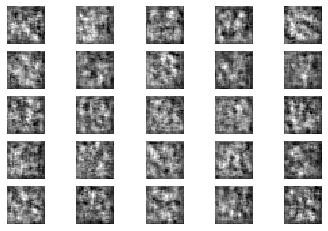

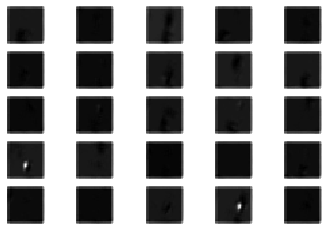

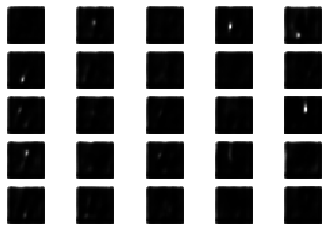

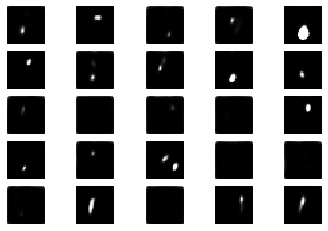

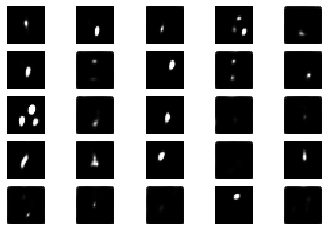

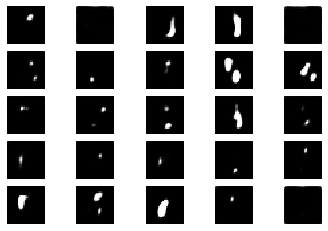

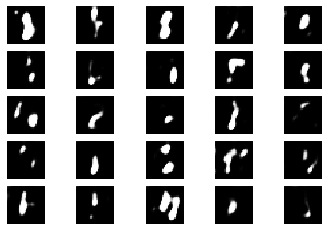

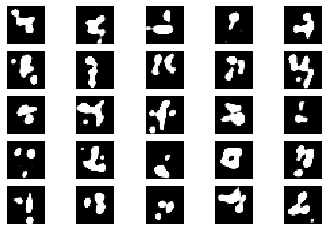

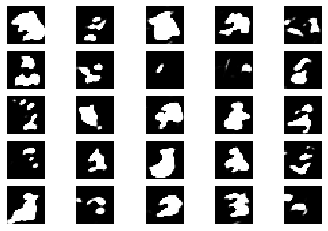

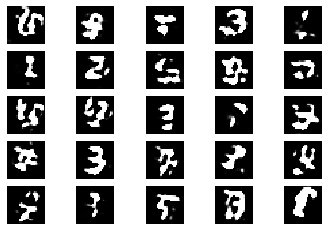

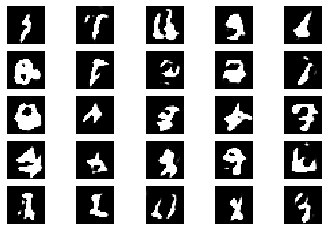

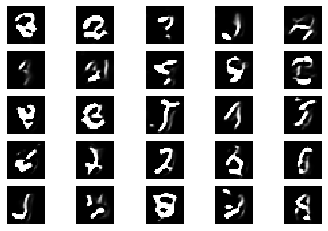

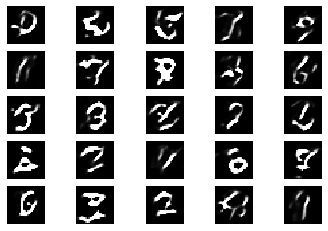

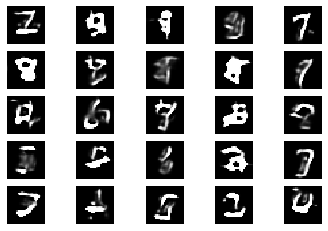

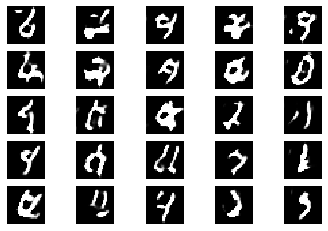

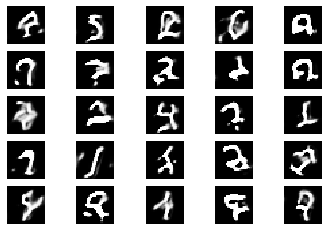

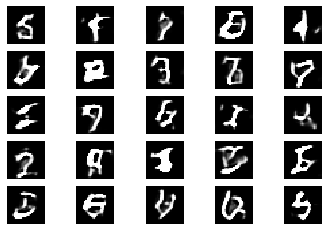

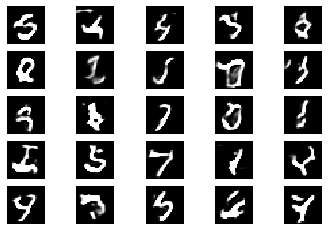

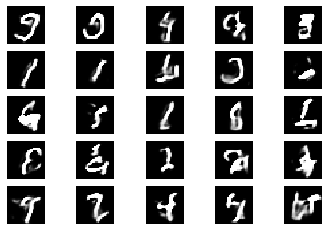

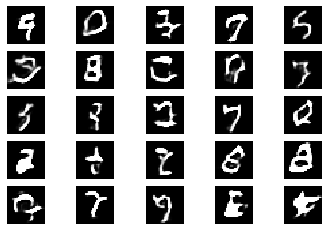

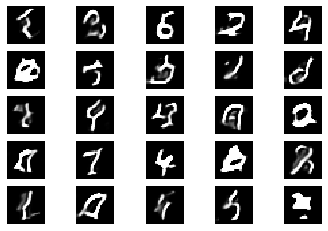

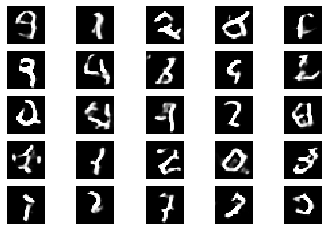

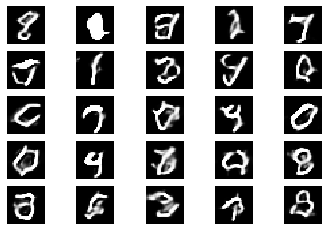

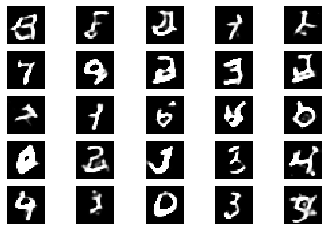

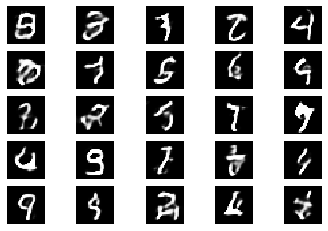

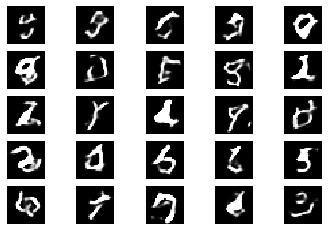

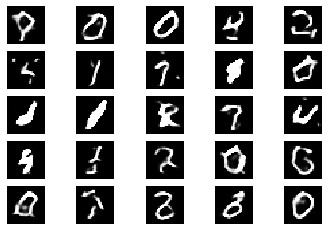

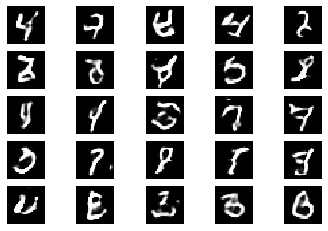

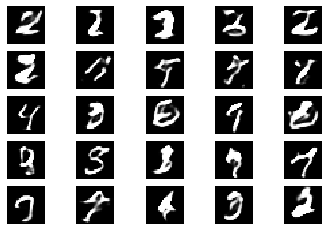

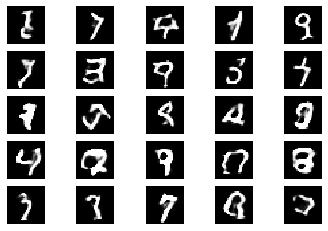

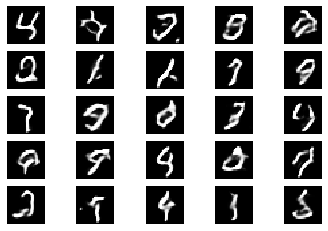

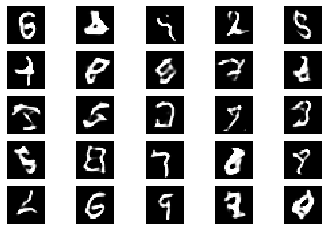

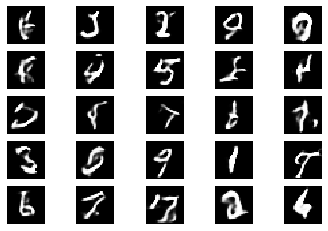

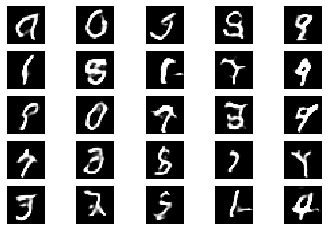

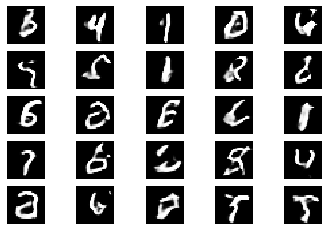

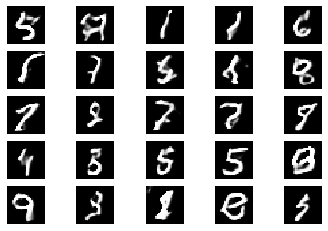

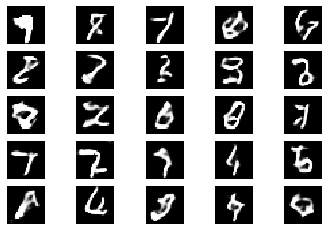

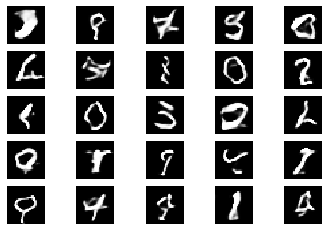

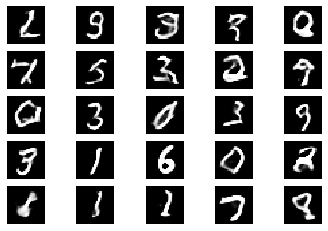

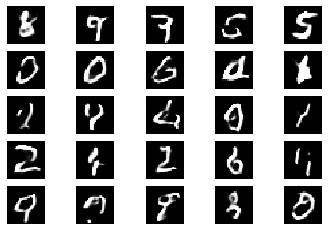

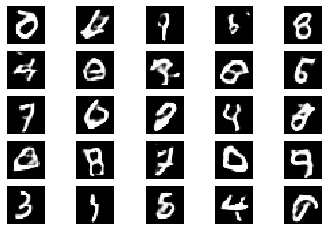

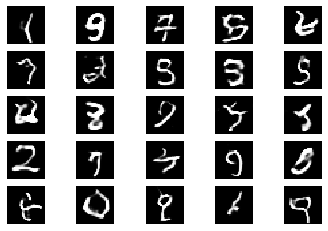

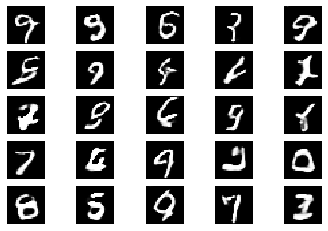

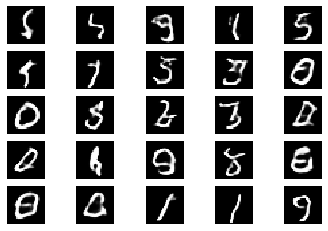

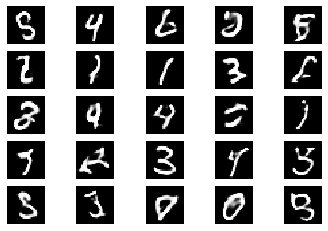

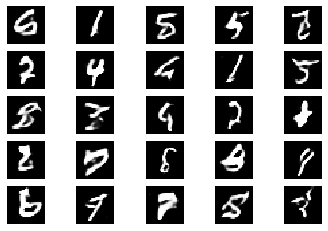

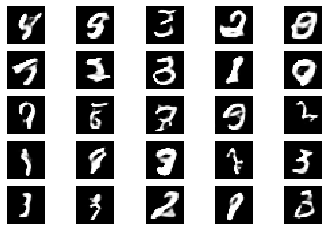

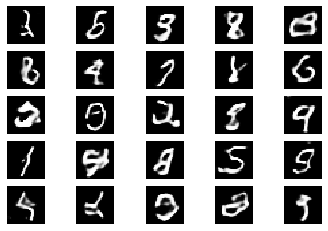

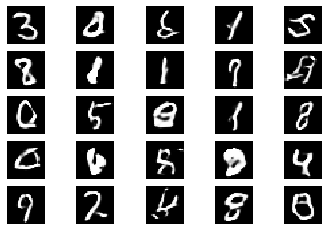

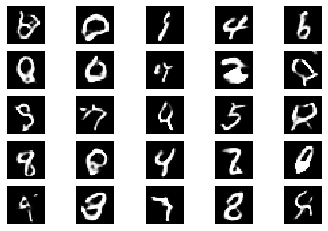

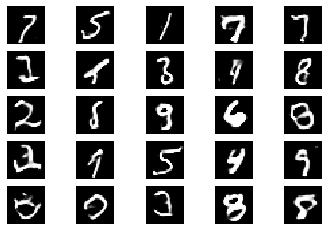

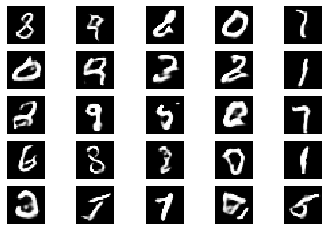

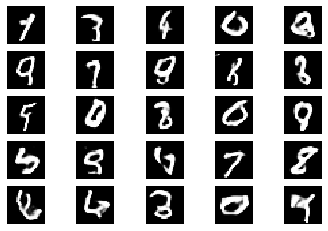

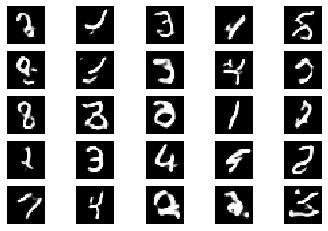

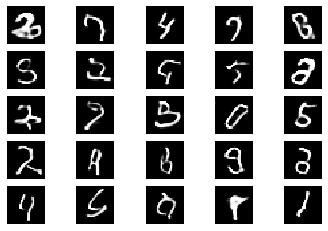

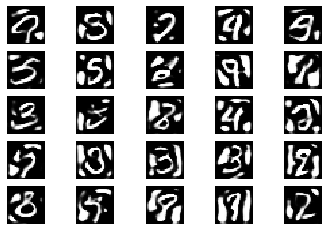

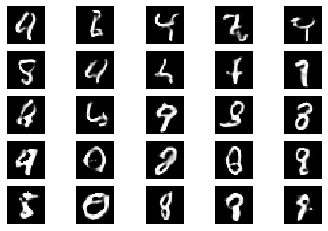

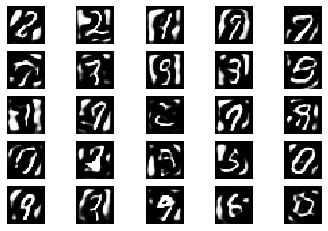

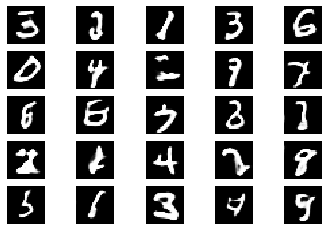

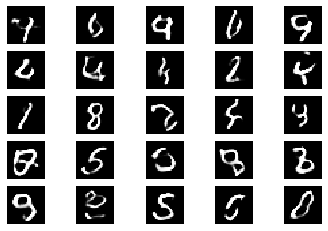

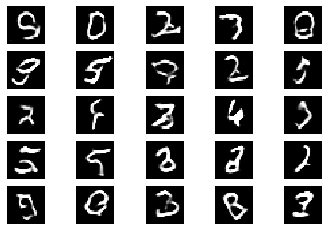

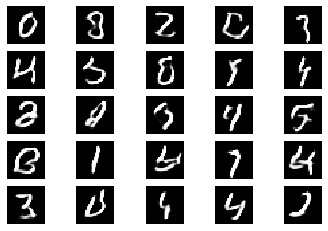

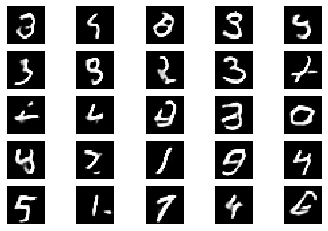

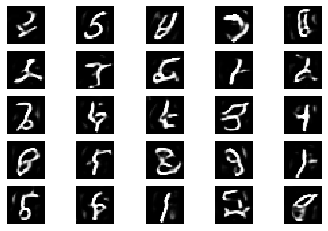

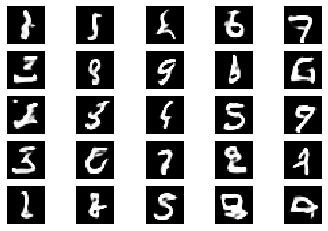

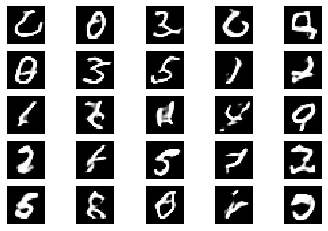

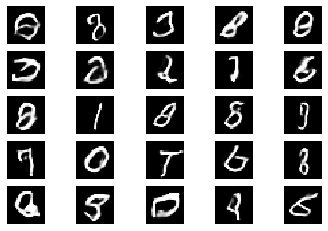

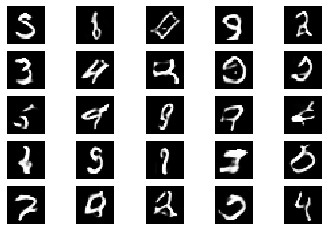

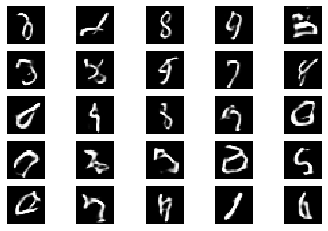

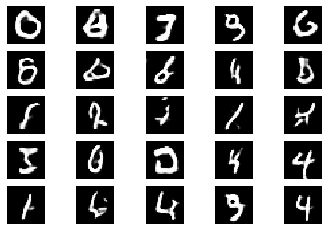

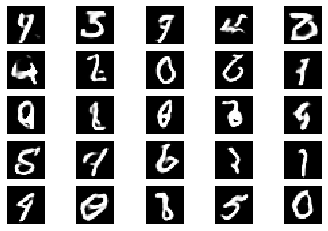

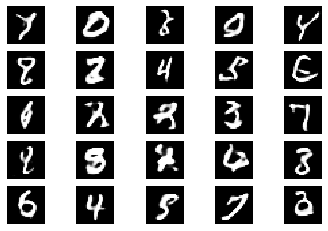

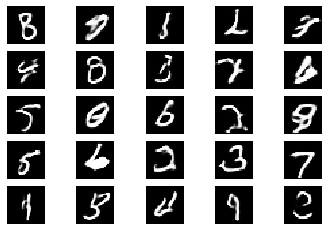

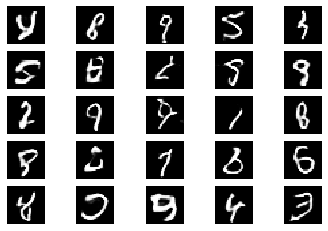

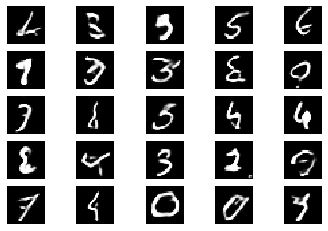

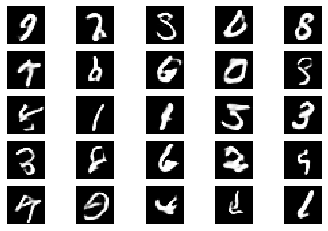

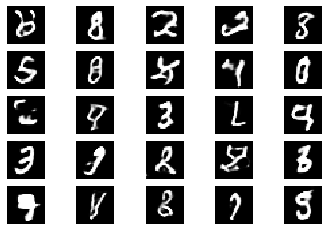

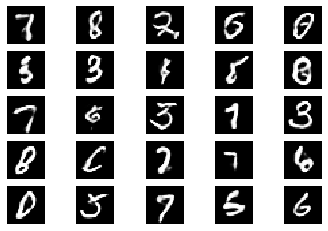

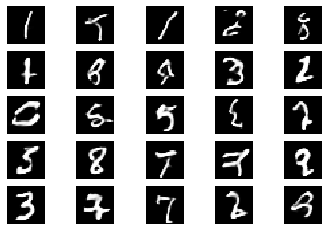

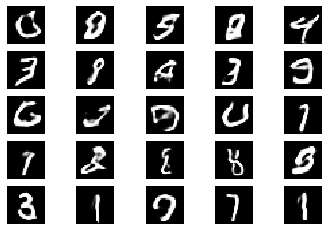

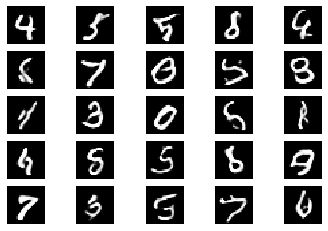

In [7]:
for i in range(epoch) :
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = d_model.train_on_batch(imgs, true)
    
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = g_model.predict(noise)
    d_loss_fake = d_model.train_on_batch(gen_imgs, fake) 

    
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true) 

    # 기록
    record = (epoch, d_loss, g_loss)
    history.append(record)
    
    print('epoch:%d' %i, ' d_Loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss) 


    
    if i % saving_interval == 0:
        #r, c = 5, 5
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = g_model.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5, 5)
        count = 0
        for j in range(5):
          for k in range(5):
              axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
              axs[j, k].axis('off')
              count += 1
        fig.savefig("gan_images/gan_mnist_%d.png" % i)

In [8]:
model_dir = './Gan_model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
g_model.save_weights('my_g_model.h5')

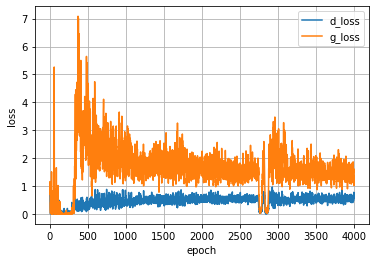

In [9]:
from pandas import Series, DataFrame
import pandas as pd 

df = DataFrame(history, columns=['epoch', 'd_loss', 'g_loss'])

df.plot(y=['d_loss', 'g_loss'])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
# def gan_train(epoch, batch_size, saving_interval) :
#     (X_train, _), (_,_) = mnist.load_data()
#     X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
#     X_train = (X_train -127.5) / 127.5
#     true = np.ones((batch_size, 1))
#     fake = np.zeros((batch_size, 1))
    
#     for i in range(epoch) :
#         idx = np.random.randint(0, X_train.shape[0], batch_size)
#         imgs = X_train[idx]
#         d_loss_real = d_model.train_on_batch(imgs, true)
        
#         noise = np.random.normal(0, 1, (batch_size, 100))
#         gen_imgs = g_model.predict(noise)
#         d_loss_fake = d_model.train_on_batch(gen_imgs, fake) 
        
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
#         g_loss = gan.train_on_batch(noise, true) 
        
#         print('epoch:%d' %i, ' dLoss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss) 
        
#         if i % saving_interval == 0:
#             #r, c = 5, 5
#             noise = np.random.normal(0, 1, (25, 100))
#             gen_imgs = g_model.predict(noise)

#             # Rescale images 0 - 1
#             gen_imgs = 0.5 * gen_imgs + 0.5

#             fig, axs = plt.subplots(5, 5)
#             count = 0
#             for j in range(5):
#               for k in range(5):
#                   axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
#                   axs[j, k].axis('off')
#                   count += 1
#             fig.savefig("gan_images/gan_mnist_%d.png" % i)